This notebook is an initial EDA

## Imports

In [2]:
import pandas as pd
import numpy as np
#import polars as pl
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score


# from sentence_transformers import SentenceTransformer
# import torch

# Set random seed for reproducibility
SEED=42
np.random.seed(SEED)
# torch.manual_seed(SEED)
# torch.cuda.manual_seed(SEED)
# torch.cuda.manual_seed_all(SEED)  # if using -multi-GPU

# # Make PyTorch deterministic
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

from funcoes import *


ModuleNotFoundError: No module named 'funcoes'

## Read the data

In [3]:
anexo_ii = pd.read_csv("../data/impic_data/anexo_ii.csv", sep=';')

C:\Users\carol\AppData\Local\Temp\ipykernel_35876\212889492.py:1: DtypeWarning: Columns (9,10,11,26) have mixed types. Specify dtype option on import or set low_memory=False.
  anexo_ii = pd.read_csv("../data/impic_data/anexo_ii.csv", sep=';')


In [5]:
anexo_ii.columns

Index(['N.º Procedimento (ID BASE)', 'Número de Convidados',
       'Prazo para apresentação das propostas', 'Previsão de renovações',
       'Critério de adjudicação', 'Prestação de caução', 'Leilão Eletrónico',
       'Número máximo de lotes por adjudicatário',
       'Fundamentação para não utilização de lotes - se aplicável',
       'Parecer Prévio - se aplicável', 'Número do parecer', 'Data do parecer',
       'Gestor do procedimento', 'Gestor do contrato',
       'Órgão competente para a decisão de contratar',
       'Instrumentos ao método de cálculo',
       'Parâmetros BASE do caderno de encargos',
       'Descrição sucinta do objeto da alienação ', 'Tipo de transmissão',
       'Valor da licitação base do(s) bem(ns)/lote(s)',
       'Prazo de apresentação das propostas', 'Júri - se aplicável',
       'Consulta Preliminar - se aplicável',
       'Habilitação para o exercício da atividade profissional?',
       'Habilitação para o exercício da atividade profissional - Informaçã

In [6]:
anexo_ii['Parâmetros BASE do caderno de encargos'].value_counts()

Parâmetros BASE do caderno de encargos
.                                                                                                     13018
NÃO SE APLICA                                                                                         10070
Não aplicável                                                                                          9617
Preço                                                                                                  8293
Preço ou custo                                                                                         6598
                                                                                                      ...  
Objecto do bem acompanhado das condições técnicas                                                         1
Cláusulas do cpaítulo II do caderno de encargos                                                           1
Localização dos espaços e caracteristicas das instalações                                        

In [4]:
anexo_xiv = pd.read_csv("../data/impic_data/anexo_xiv.csv", sep=';')

C:\Users\carol\AppData\Local\Temp\ipykernel_35876\3333173113.py:1: DtypeWarning: Columns (2,3,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  anexo_xiv = pd.read_csv("../data/impic_data/anexo_xiv.csv", sep=';')


In [7]:
anexo_xiv.columns

Index(['N.º Procedimento (ID BASE)', 'ID Contrato',
       'Descrição do serviço, se aplicável',
       'Informação sobre contratos reservados', 'Gestor do contrato',
       'Subcontratação', 'NIF Subcontratado', 'Nome Subcontratado',
       'Preço Total Efetivo', 'Preço unitário (caso aplicável)',
       'Fundamentação da eficácia retroativa ao contrato',
       'Data de Fecho do Contrato', 'Data de Fecho do Contrato Física',
       'Contrato no âmbito do setor público'],
      dtype='object')

In [8]:
anexo_xiv['Fundamentação da eficácia retroativa ao contrato'].value_counts()

Fundamentação da eficácia retroativa ao contrato
Outro                                                               173
Exigência imperiosa de direito público (artigo 287º, 2.º do CCP)     78
Name: count, dtype: int64

In [3]:
contratos = pd.read_csv("../data/impic_data/contratos.csv", sep=';')
anexo_xii = pd.read_csv("../data/impic_data/anexo_xii.csv", sep=';')
lotes = pd.read_csv("../data/impic_data/lotes.csv", sep=';')

C:\Users\carol\AppData\Local\Temp\ipykernel_11724\2880074606.py:1: DtypeWarning: Columns (18,19,23,24,25,26,27,28,29,30,31,32,33,34,35,38,39,40,41,43,44,52,54) have mixed types. Specify dtype option on import or set low_memory=False.
  contratos = pd.read_csv("../data/impic_data/contratos.csv", sep=';')


In [5]:
pd.to_datetime(contratos['Data Celebração'], errors='coerce').dt.year.value_counts()

Data Celebração
2023.0    187398
2021.0    178386
2022.0    173723
2020.0    150972
2019.0    145689
2018.0    118648
Name: count, dtype: int64

In [3]:
contratos.columns

Index(['N.º Procedimento (ID BASE)', 'N.º Contrato', 'Tipo de procedimento',
       'Ajuste Direto Simplificado', 'Contratação Excluída',
       'Identificação do contrato', 'Objeto', 'Data Decisão Contratar',
       'Data da decisão adjudicação', 'Data Celebração',
       'Prazo de execução do contrato (dias)', 'Fase', 'Estado',
       'Tipo(s) de contrato', 'Procedimento de contratação centralizado',
       'Procedimento destinado à satisfação...',
       'Fundamentação para a escolha...', 'Ao abrigo dos critérios materiais',
       'CPV', 'CPV Designação', 'CPV Valor',
       'Local de execução das principais prestações objeto do contrato',
       'Data de fecho do contrato',
       'Causas das alterações ao prazo de execução do contrato',
       'Causas das alterações no valor do contrato',
       'Informação relevante sobre outros aspetos da execução do contrato',
       'Motivo do cumprimento não integral do contrato',
       'Data de registo do cumprimento não integral do contra

In [4]:
contratos['Identificação do contrato'].value_counts()

Identificação do contrato
Serviços                                                                                                  32335
Materiais                                                                                                 31233
Materiais de stock                                                                                        14250
Serviços de formação                                                                                      11463
MEDICAMENTOS                                                                                               8038
                                                                                                          ...  
3020006411/3003 CN/MATERIAL DE SEGURANÇA - MÁSCARAS                                                           1
3009/3020008227- SUBSTITUIÇÃO DO ELEVADOR N.º 6 DA UNIDADE DE APOIO ÀS INSTALAÇÕES CENTRAIS DA MARINHA        1
3020002766 / 3007 / AQUISIÇÃO SEEPIRBS GPS                                    

In [5]:
contratos['Objeto'].value_counts()

Objeto
Serviços                                                     32327
Materiais                                                    31233
Materiais de stock                                           14250
Serviços de formação                                         11466
MEDICAMENTOS                                                  8220
                                                             ...  
3020004837/3003 CN/MATERIAL APOIO - OBRAS CITAN                  1
3020005686/3002/Outros serviços                                  1
3020016125/Fornecimento de Sobressalentes - NRP João Roby        1
3020001804/3003 CN/MATERIAL DIVERSO - APOIO UN                   1
Aquisição de serviços de jardinagem e silvicultura               1
Name: count, Length: 1753503, dtype: int64

## Colunas relevantes e exploração de duplicados

#### Anexo XII modificação contratual

In [6]:
anexo_xii.isna().sum()

N.º Procedimento (ID BASE)                                                                              0
N.º Contrato                                                                                            0
Data da Publicação da MC                                                                                0
Data da Modificação                                                                                     3
Fundamentação da MC                                                                                     0
Tipo do Ato                                                                                             0
Nº do Lote                                                                                              0
Preço Contratual Original                                                                               0
Novo Preço Contratual                                                                                   0
Objeto da subcontratação                      

In [7]:
anexo_xii['Tipo do Ato'].value_counts()

Tipo do Ato
Acordo entre as partes    30458
Acto Administrativo        7895
Decisão Judicial             41
Decisão Arbitral             18
Name: count, dtype: int64

In [8]:
anexo_xii[anexo_xii['Tipo do Ato']=='Decisão Judicial']['Fundamentação da MC'].value_counts()

Fundamentação da MC
Interesse público decorrentes de necessidades novas ou de uma nova ponderação das circunstâncias existentes (art. 312.º, al. b) do CCP)                                                               9
Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)                                                                                                                       9
Cessão da posição contratual e subcontratação (art. 316.º e seguintes do CCP)                                                                                                                         6
Serviços Complementares (art. 454.º do CCP)                                                                                                                                                           5
Cláusulas contratuais que indiquem de forma clara, precisa e inequívoca o âmbito e a natureza das eventuais modificações, bem como as condições em que podem ser aplicadas (art. 312

#### Contratos

In [9]:
contratos[contratos['Data de registo do cumprimento não integral do contrato'].notna()]

,N.º Procedimento (ID BASE),N.º Contrato,Tipo de procedimento,Ajuste Direto Simplificado,Contratação Excluída,Identificação do contrato,Objeto,Data Decisão Contratar,Data da decisão adjudicação,Data Celebração,...,Preço BASE (€),Preço Contratual (€),Valor estimado do(s) contrato(s) (€) (s/IVA),Valor máximo estimado do(s) contrato(s) (€) (s/IVA),Preço total efetivo s/IVA (€),Valor total dos trabalhos sub-contratados (s/IVA) (€),Entidade(s) Adjudicatária(s) - NIF,Entidade(s) Adjudicatária(s) - Descrição,Entidade(s) Adjudicante(s) - NIF,Entidade(s) Adjudicante(s) - Descrição
10,2952111,4392347,Concurso público,0,0,29/2018,Aquisição de combustíveis rodoviários e portag...,NaN,'2018-01-03 00:00:00.000','2018-03-07 00:00:00.000',...,3737321.08,12960.20,3737321.08,NaN,9478.51,NaN,500697370,"Petrogal, S.a.",508188423.0,"Administração Central do Sistema de Saúde, I. P."
14,3035744,4402997,Concurso público,0,0,NPD 4395000175 / NPD 4395000176 - Contrato de ...,NPD 4395000175 / NPD 4395000176\nContrato de p...,NaN,'2018-02-15 00:00:00.000','2018-03-14 00:00:00.000',...,751756.03,47169.81,751756.03,NaN,11697.95,NaN,505259397,"Osíris ? Viagens E Turismo, Lda",600086755.0,Comissão Nacional de Promoção dos Direitos e P...
27,3340349,4750206,Concurso público,0,0,PROC-DP-32/2018 - Aquisição de Serviços de Des...,PROC-DP-32/2018 - Aquisição de Serviços de Des...,'2018-03-09 00:00:00.000','2018-06-08 00:00:00.000','2018-07-09 00:00:00.000',...,51000.00,15002.32,NaN,NaN,14102.79,NaN,506982904,"Desilíder - Controlo E Eliminação De Pragas, Lda.",514310774.0,"Águas do Douro e Paiva, S. A."
29,3043614,4751008,Concurso público,0,0,Aquisição de serviços para pagamentos por débi...,Aquisição de serviços para pagamentos por débi...,NaN,'2018-02-22 00:00:00.000','2018-04-23 00:00:00.000',...,156600.00,28800.00,156600.00,NaN,23208.14,NaN,500844321,"Banco Santander Totta, S.a.",509107630.0,"AdRA - Águas da Região de Aveiro, S. A."
31,3534991,4755506,Ao abrigo de acordo-quadro (art.º 259.º),0,0,"Licenciamento do software Microsoft, para as p...","Licenciamento do software Microsoft, para as p...",'2018-04-05 00:00:00.000','2018-05-24 00:00:00.000','2018-06-07 00:00:00.000',...,349640.00,16597.69,349640.00,NaN,16597.69,NaN,980079659,Inetum España Sa,505869721.0,Instituto Superior de Agronomia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545678,6756298,10365472,Consulta Prévia,0,0,Empreitada para execução de obras de recuperaç...,Empreitada para execução de obras de recuperaç...,'2023-07-05 00:00:00.000','2023-10-14 00:00:00.000','2023-10-23 00:00:00.000',...,29000.00,28982.65,NaN,NaN,28982.36,0.0,505599422,"Construções Silva Batista & Filhos, Lda",501192026,Fábrica da Igreja da Freguesia de Penacova
2545687,7058926,10737079,Consulta Prévia,0,0,AQUISIÇÃO DE VIATURA ELÉTRICA PARA SAD,FORNECIMENTO DE UMA VIATURA ELÉTRICA LIGEIRA D...,'2022-05-17 00:00:00.000','2022-06-20 00:00:00.000','2022-06-21 00:00:00.000',...,27090.00,25335.80,NaN,NaN,25335.80,NaN,500254273,Sacel- Soc. Auto Central Leiriense,504073931,Associação O Socorro Gaeirense
2545696,7010495,10697010,Consulta Prévia,0,0,Aquisição de viatura elétrica com adaptação de...,Aquisição de veículo elétrico ligeiro de merca...,'2021-09-20 00:00:00.000','2022-09-26 00:00:00.000','2022-10-07 00:00:00.000',...,25000.00,25000.00,NaN,NaN,30767.43,NaN,500035350,Auto Industrial S.a.,501678077,Centro de Apoio a Jovens e Idosos do Lumiar - ...
2545711,7237343,10948779,Consulta Prévia,0,0,MOBILIDADE VERDE SAD - Aquisição de Viaturas E...,Aquisição de viatura eléctrica para Serviço de...,'2023-02-02 00:00:00.000','2023-05-11 00:00:00.000','2023-06-09 00:00:00.000',...,34900.00,34900.00,NaN,NaN,34900.00,NaN,513672273,Onda Predileta Lda.,501796649,Centro Social Paroquial de Nossa Senhora Mãe d...


In [10]:
contratos[(contratos['Informação relevante relativa às sub-empreitadas'].notna()==True) & (contratos['Número de empresas de construção sub-contratadas'].notna()==True)]['Número de empresas de construção sub-contratadas'].value_counts()

Número de empresas de construção sub-contratadas
0.0     2266
7.0       10
9.0        4
8.0        4
12.0       4
Name: count, dtype: int64

In [11]:
contratos['Número de empresas de construção sub-contratadas'].value_counts()

Número de empresas de construção sub-contratadas
0.0     35313
7.0        10
9.0         4
8.0         4
12.0        4
Name: count, dtype: int64

In [12]:
contratos[(contratos['Informação relevante relativa às sub-empreitadas'].notna()==True)]

,N.º Procedimento (ID BASE),N.º Contrato,Tipo de procedimento,Ajuste Direto Simplificado,Contratação Excluída,Identificação do contrato,Objeto,Data Decisão Contratar,Data da decisão adjudicação,Data Celebração,...,Preço BASE (€),Preço Contratual (€),Valor estimado do(s) contrato(s) (€) (s/IVA),Valor máximo estimado do(s) contrato(s) (€) (s/IVA),Preço total efetivo s/IVA (€),Valor total dos trabalhos sub-contratados (s/IVA) (€),Entidade(s) Adjudicatária(s) - NIF,Entidade(s) Adjudicatária(s) - Descrição,Entidade(s) Adjudicante(s) - NIF,Entidade(s) Adjudicante(s) - Descrição
124,2592739,4348579,Concurso público,0,0,"Requalificação da E.M. 520, entre a rua dos Ca...","Requalificação da E.M. 520, entre a rua dos Ca...",NaN,'2017-06-19 00:00:00.000','2018-03-14 00:00:00.000',...,459660.0,348850.02,NaN,NaN,324584.15,44042.0,502896604,"Paviazeméis - Pavimentações De Azeméis, Lda",501157280.0,Município de Santa Maria da Feira
125,2592739,4348579,Concurso público,0,0,"Requalificação da E.M. 520, entre a rua dos Ca...","Requalificação da E.M. 520, entre a rua dos Ca...",NaN,'2017-06-19 00:00:00.000','2018-03-14 00:00:00.000',...,459660.0,348850.02,NaN,NaN,324584.15,44042.0,502896604,"Paviazeméis - Pavimentações De Azeméis, Lda",501157280.0,Município de Santa Maria da Feira
9509,3624589,5575378,Concurso público,0,0,DRENAGEM DOMÉSTICA DA RUA GAGO COUTINHO,DRENAGEM DOMÉSTICA DA RUA GAGO COUTINHO,'2018-09-19 00:00:00.000','2018-12-12 00:00:00.000','2019-04-03 00:00:00.000',...,210000.0,197570.53,NaN,NaN,197856.35,0.0,507610040,"Margespi - Consultoria, Gestão Administrativa ...",506673626.0,Município do Barreiro
10614,3708738,5785296,Concurso público,0,0,390/2018,Empreitada de execução de trabalhos de substit...,'2018-11-30 00:00:00.000','2019-01-22 00:00:00.000','2019-02-18 00:00:00.000',...,270000.0,239444.32,NaN,NaN,351005.27,0.0,502022469,"Omep-obras Medições E Projetos, Ldª",500792887.0,"IMPRENSA NACIONAL CASA DA MOEDA, S.A."
13366,3670834,5827686,Concurso público,0,0,Construção de balneários de apoio ao campo de ...,Construção de balneários de apoio ao campo de ...,'2018-11-05 00:00:00.000','2019-02-25 00:00:00.000','2019-05-21 00:00:00.000',...,365000.0,357873.24,NaN,NaN,368956.00,0.0,501982248,"Secal Engenharia E Construções, Sa",506676056.0,Município de Benavente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513222,5799430,9335269,Concurso público,0,0,Empreitada de Reabilitação das ETAR Compactas ...,Empreitada de Reabilitação das ETAR Compactas ...,'2022-02-21 00:00:00.000','2022-04-19 00:00:00.000','2022-06-06 00:00:00.000',...,480000.0,474590.59,NaN,NaN,470304.87,0.0,506477940,"Ambiagua, Gestão De Equipamentos De Águas, S.a.",514310103,"SIMDOURO - Saneamento do Grande Porto, S. A."
2520432,6047429,10789009,Concurso público,0,0,CP 19005722 _ Empreitada _ Remodelação do Serv...,CP 19005722 _ Empreitada _ Remodelação do Serv...,'2022-06-30 00:00:00.000','2022-10-06 00:00:00.000','2022-10-20 00:00:00.000',...,139900.0,118207.51,NaN,NaN,120283.29,0.0,509723560,"Wikibuild, S.a.",514993871,"Unidade Local de Saúde do Oeste, E. P. E."
2520433,6047429,10789009,Concurso público,0,0,CP 19005722 _ Empreitada _ Remodelação do Serv...,CP 19005722 _ Empreitada _ Remodelação do Serv...,'2022-06-30 00:00:00.000','2022-10-06 00:00:00.000','2022-10-20 00:00:00.000',...,139900.0,118207.51,NaN,NaN,120283.29,0.0,509723560,"Wikibuild, S.a.",514993871,"Unidade Local de Saúde do Oeste, E. P. E."
2521965,5833342,9942029,Concurso público,0,0,Empreitada - Remodelação e Beneficiação da Med...,Empreitada - Remodelação e Beneficiação da Med...,'2022-01-27 00:00:00.000','2022-05-19 00:00:00.000','2022-06-06 00:00:00.000',...,373534.0,363682.29,NaN,NaN,378633.16,0.0,509723560,"Wikibuild, S.a.",514993871,"Unidade Local de Saúde do Oeste, E. P. E."


In [13]:
contratos['Informação relevante relativa às sub-empreitadas'].value_counts().tail(30)

Informação relevante relativa às sub-empreitadas
Trabalhos a realizar na 1ª subcategoria da 2ª categoria - Vias de circulação rodoviária e aeródromos.                                                                                                                                                                                                                                                                             1
Não aplicável. Verificar separador de subcontratação para informação pormenorizada.                                                                                                                                                                                                                                                                                               1
Atlantigás- Técnicos de Energia, Lda - Responsável pela rede de gás e pelo sistema AQS referentes às 12ª subcategoria e 14ª subcategoria da 4ªcategoria                                                        

In [14]:
contratos[contratos['Informação relevante sobre outros aspetos do cumprimento não integral do contrato']=='cumprimento integral de todas as obrigações contratuais']['Motivo do cumprimento não integral do contrato'].values[0]

'O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil'

In [15]:
contratos['Aspetos do desenvolvimento da obra'].value_counts().head(25)

Aspetos do desenvolvimento da obra
-                                                                                                                                                                                                                                                                                                                                                     374
.                                                                                                                                                                                                                                                                                                                                                     217
A obra foi executada de acordo com o projeto e caderno de encargos                                                                                                                                                                                                               

## Duplicados

In [16]:
contratos[contratos.duplicated(keep=False)==True].shape

(242, 56)

In [17]:
contratos[contratos.duplicated(subset=['N.º Contrato', 'N.º Procedimento (ID BASE)'], keep=False)==True].shape

(15744, 56)

In [18]:
dups = contratos[contratos.duplicated(subset=['N.º Contrato', 'N.º Procedimento (ID BASE)'], keep=False)==True]

In [19]:
diffs = []
for (proc, contrato), group in dups.groupby(['N.º Procedimento (ID BASE)', 'N.º Contrato']):
    if len(group) > 1:
        # Ver colunas onde existem valores diferentes
        unequal_cols = [col for col in group.columns if group[col].nunique() > 1]
        if unequal_cols:
            diffs.append({
                "N.º Procedimento (ID BASE)": proc,
                "N.º Contrato": contrato,
                "colunas_diferentes": unequal_cols
            })

df_diffs = pd.DataFrame(diffs)

In [20]:
# colunas diferentes quando o nº do procedimento e o número do contrato são iguais
df_diffs['colunas_diferentes'].value_counts()

colunas_diferentes
[Prorrogação de Prazo]                                                                                                                                                             3269
[Datas de consignação (art.º 357.º a art.º 360.º do CCP)]                                                                                                                           819
[Duração (dias) da obra]                                                                                                                                                            790
[Duração (dias) da obra, Prorrogação de Prazo]                                                                                                                                      640
[Datas de consignação (art.º 357.º a art.º 360.º do CCP), Prorrogação de Prazo]                                                                                                      85
[Data de início de execução da obra, Data de retoma da execuç

As coluna que são diferentes quando estes dois valores são iguais não me parecem relevantes. A questão é qual deles é que vamos manter, como é que eu sei quais são os números certos.

#### Conclusões

**Colunas relevantes no DataSet contratos:**

- 'N.º Procedimento (ID BASE)',
- 'N.º Contrato'
- 'Tipo de procedimento',
- 'Ajuste Direto Simplificado'
- 'Contratação Excluída',
- 'Identificação do contrato'
- 'Objeto'
- 'Data Decisão Contratar'
- 'Data da decisão adjudicação'
- 'Data Celebração'
- 'Prazo de execução do contrato (dias)',
- Tipo(s) de contrato
- 'Procedimento destinado à satisfação...'
- 'Fundamentação para a escolha...'
- 'Ao abrigo dos critérios materiais',
- 'Data de fecho do contrato',
- 'Causas das alterações ao prazo de execução do contrato',
- 'Causas das alterações no valor do contrato',
- 'Informação relevante sobre outros aspetos da execução do contrato'
- 'Motivo do cumprimento não integral do contrato',
- 'Data de registo do cumprimento não integral do contrato',
- 'Informação relevante sobre outros aspetos do cumprimento não integral do contrato',
- 'Apreciação sobre o desenvolvimento da obra',
- 'Data de início de execução da obra',
- 'Data de retoma da execução da obra', 
- 'Duração (dias) da obra',
- 'Prorrogação de Prazo',
- 'Causas das alterações ao prazo de execução da obra',
- 'Causas das alterações no valor da obra',
- 'Fatores externos condicionantes do arranque e desenvolvimento da obra',
- 'Aspetos do desenvolvimento da obra',
- 'Número de empresas de construção sub-contratadas',
- 'Informação relevante relativa às sub-empreitadas',
- 'Informação sobre Trabalhos Complementares',
- 'Preço BASE (€)', 
- 'Preço Contratual (€)',
- 'Entidade(s) Adjudicatária(s) - NIF',
- 'Entidade(s) Adjudicatária(s) - Descrição',
- 'Entidade(s) Adjudicante(s) - NIF',
- 'Entidade(s) Adjudicante(s) - Descrição'


**Colunas relevantes no DataSet lotes:**

- 'IDAliasProc', 
- 'Descrição do Procedimento', 
- 'ContractID',
- 'Descrição do Contrato',
- 'Breve Descrição do Contrato',
- 'Preço Contratual', 
- 'Número de Ordem do Lote', 
- 'Designação do Lote',
- 'Valor do Lote'

Aqui a pior coluna (com menos informação relevante) é a descrição do contrato. O melhor é a coluna de 'Breve Descrição do Contrato' e 'Descrição do Procedimento', têm as duas informação muito parecida. O melhor depois, mesmo para a tese, é indicar as faltas e as coisas más nestas colunas. 

**Colunas relevantes no dataset Anexo XII** - relatório de modificação contratual -> TODAS



**Próximos passos** - Tratar estes datasets:

- Ver os duplicados
- Ver os missing values
- Ver as incoerências
- Fazer merge e passar para arrow
- Tratar as colunas de texto e fazer algum tipo de grouping



Todos os contratos que têm o tipo de procedimento missing são contratação excluída

In [21]:
contratos[contratos['Tipo de procedimento'].isna()==True]['Contratação Excluída'].value_counts()

Contratação Excluída
1    250482
Name: count, dtype: int64

In [22]:
contratos[contratos['Objeto'].isna()==True]

,N.º Procedimento (ID BASE),N.º Contrato,Tipo de procedimento,Ajuste Direto Simplificado,Contratação Excluída,Identificação do contrato,Objeto,Data Decisão Contratar,Data da decisão adjudicação,Data Celebração,...,Preço BASE (€),Preço Contratual (€),Valor estimado do(s) contrato(s) (€) (s/IVA),Valor máximo estimado do(s) contrato(s) (€) (s/IVA),Preço total efetivo s/IVA (€),Valor total dos trabalhos sub-contratados (s/IVA) (€),Entidade(s) Adjudicatária(s) - NIF,Entidade(s) Adjudicatária(s) - Descrição,Entidade(s) Adjudicante(s) - NIF,Entidade(s) Adjudicante(s) - Descrição
1411161,5087886,7422288,Ajuste direto simplificado,1,0,NaN,NaN,NaN,NaN,NaN,...,0.0,19.77,NaN,NaN,19.77,NaN,507505786,Restaurante Cabicanca,600080854,Agrupamento de Escolas Padre José Augusto da F...
1411162,5087947,7422384,Ajuste direto simplificado,1,0,NaN,NaN,NaN,NaN,NaN,...,0.0,224.46,NaN,NaN,224.46,NaN,503276626,"Dcs, Lda",600080854,Agrupamento de Escolas Padre José Augusto da F...
2055743,6438239,9916173,Ajuste direto simplificado,1,0,NaN,NaN,NaN,NaN,NaN,...,0.0,26.30,NaN,NaN,26.30,NaN,501906355,"Impoeste - Tintas Equip. Pinturas, S.a.",501926895,Centro de Formação Profissional da Reparação A...


In [23]:
contratos[(contratos['Tipo de procedimento'].isna()==True) & (contratos['Preço Contratual (€)']<1000)]

,N.º Procedimento (ID BASE),N.º Contrato,Tipo de procedimento,Ajuste Direto Simplificado,Contratação Excluída,Identificação do contrato,Objeto,Data Decisão Contratar,Data da decisão adjudicação,Data Celebração,...,Preço BASE (€),Preço Contratual (€),Valor estimado do(s) contrato(s) (€) (s/IVA),Valor máximo estimado do(s) contrato(s) (€) (s/IVA),Preço total efetivo s/IVA (€),Valor total dos trabalhos sub-contratados (s/IVA) (€),Entidade(s) Adjudicatária(s) - NIF,Entidade(s) Adjudicatária(s) - Descrição,Entidade(s) Adjudicante(s) - NIF,Entidade(s) Adjudicante(s) - Descrição
7474,4300207,6104444,NaN,0,1,Formação profissional AP Digital 4.0. Inovação...,Formação profissional AP Digital 4.0. Inovação...,'2019-11-15 00:00:00.000','2019-11-15 00:00:00.000',NaN,...,0.0,140.00,NaN,NaN,140.00,NaN,600084876,Direção-geral Da Qualificação Dos Trabalhadore...,600081125.0,SecretariaGeral da Economia
7746,4218269,5948300,NaN,0,1,Liquidação de taxas de Direito Conexos pela Ut...,Liquidação de taxas de Direito Conexos pela Ut...,'2019-10-08 00:00:00.000','2019-10-09 00:00:00.000',NaN,...,0.0,164.68,NaN,NaN,164.68,NaN,506304175,"Audiogest - Ass. Gestão E Distrib.direitos, As...",505931192.0,Município de Aveiro
8023,4157070,5816990,NaN,0,1,"Reforço de Potência de IP, na Rua Artur de Alm...","Reforço de Potência de IP, na Rua Artur de Alm...",'2017-10-19 00:00:00.000','2018-04-12 00:00:00.000',NaN,...,0.0,981.34,NaN,NaN,981.34,NaN,504394029,"E-redes - Distribuição De Eletricidade, S.a.",505931192.0,Município de Aveiro
8034,4157050,5816944,NaN,0,1,"Aumento de Potência BT, com Substituição da Li...","Aumento de Potência BT, com Substituição da Li...",'2018-10-05 00:00:00.000','2018-10-18 00:00:00.000',NaN,...,0.0,255.47,NaN,NaN,255.47,NaN,504394029,"E-redes - Distribuição De Eletricidade, S.a.",505931192.0,Município de Aveiro
8037,4156350,5815520,NaN,0,1,"Alteração de Potência de IP, com Montagem de C...","Alteração de Potência de IP, com Montagem de C...",'2017-10-19 00:00:00.000','2018-03-07 00:00:00.000',NaN,...,0.0,725.98,NaN,NaN,725.98,NaN,504394029,"E-redes - Distribuição De Eletricidade, S.a.",505931192.0,Município de Aveiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545192,6758309,10321258,NaN,0,1,Publicação no Diário da República,Publicação no Diário da República,'2023-09-14 00:00:00.000','2023-09-14 00:00:00.000',NaN,...,0.0,284.23,NaN,NaN,284.23,NaN,500792887,"Imprensa Nacional Casa Da Moeda, S.a.",517622610,Comissão de Coordenação e Desenvolvimento Regi...
2545433,6822038,10398689,NaN,0,1,Publicação de anúncio no DR,Publicação de anúncio no DR,'2023-01-18 00:00:00.000','2023-01-18 00:00:00.000',NaN,...,0.0,13.46,NaN,NaN,13.46,NaN,500792887,"Imprensa Nacional Casa Da Moeda, S.a.",517622610,Comissão de Coordenação e Desenvolvimento Regi...
2545444,6822036,10398688,NaN,0,1,Publicação de anúncio no DR,Publicação de anúncio no DR,'2023-01-18 00:00:00.000','2023-01-18 00:00:00.000',NaN,...,0.0,26.92,NaN,NaN,26.92,NaN,500792887,"Imprensa Nacional Casa Da Moeda, S.a.",517622610,Comissão de Coordenação e Desenvolvimento Regi...
2545449,6776259,10343310,NaN,0,1,Publicação no DR,Publicação no DR,'2023-05-23 00:00:00.000','2023-05-23 00:00:00.000',NaN,...,0.0,13.46,NaN,NaN,13.46,NaN,500792887,"Imprensa Nacional Casa Da Moeda, S.a.",517622610,Comissão de Coordenação e Desenvolvimento Regi...


In [24]:
contratos['Tipo(s) de contrato'].value_counts()

Tipo(s) de contrato
Aquisição de bens móveis          1331816
Aquisição de serviços             1109645
Empreitadas de obras públicas       88039
Locação de bens móveis              13883
Outros                               1106
Concessão de serviços públicos        786
Concessão de obras públicas           428
Sociedade                              39
Name: count, dtype: int64

In [25]:
contratos['Tipo de procedimento'].isna().sum()/contratos.shape[0]*100

9.839253152911803

Coisas a tirar no preprocessamento:

- Preços abaixo do zero
- Data antes e depois do limite
- Contratação excluída
- Duplicados
- Colunas pouco relevantes, já identificadas

## Preprocessar (inicial)

In [26]:
contratos[contratos['Apreciação sobre o desenvolvimento da obra'].notna()==True]['Apreciação sobre o desenvolvimento da obra'].value_counts().tail(20)

Apreciação sobre o desenvolvimento da obra
A obra era simples e desenvolveu-se conforme previsto, excluindo o atraso.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1
Em conformidade com o Caderno de Encargos (Auto de Receção Provisória elaborado pela DIE)                                                                                                                                                                                                                                       

In [27]:
contratos.drop(columns=['Fase', 'Estado', 'Procedimento de contratação centralizado', 'Data Decisão Contratar','Data da aprovação do plano de segurança e saúde (art.º 362.º , n.º 1 do CCP)', 
                        'Datas de consignação (art.º 357.º a art.º 360.º do CCP)', 'Data da receção provisória (art.º 395.º do CCP)', 'Data da conta final da empreitada (art.º 399.º a art.º 401.º do CCP)', 
                        'Valor estimado do(s) contrato(s) (€) (s/IVA)', 'Valor máximo estimado do(s) contrato(s) (€) (s/IVA)', 'Preço total efetivo s/IVA (€)', 
                        'Valor total dos trabalhos sub-contratados (s/IVA) (€)', 'Ao abrigo dos critérios materiais', 'Causas das alterações ao prazo de execução da obra', 'Causas das alterações no valor da obra',
                        'CPV', 'CPV Designação'], inplace=True)
contratos.drop_duplicates(inplace=True)
# ainda não vou eliminar os que são duplicados só no número e procedimento porque não sei qual das colunas duplicadas é a certa
lotes.drop(columns=['Descrição do Contrato'], inplace=True)

In [28]:
contratos_remove = preprocessar_contratos(contratos)

mask = contratos.set_index(['N.º Procedimento (ID BASE)', 'N.º Contrato']).index.isin(
    contratos_remove.set_index(['N.º Procedimento (ID BASE)', 'N.º Contrato']).index
)

contratos_cleaned = deepcopy(contratos.loc[~mask])

In [29]:
lotes_remove = preprocessar_lotes(lotes)

mask = lotes.set_index(['IDAliasProc', 'ContractID']).index.isin(
    lotes_remove.set_index(['IDAliasProc', 'ContractID']).index
)

lotes_cleaned = deepcopy(lotes.loc[~mask])

In [30]:
anexo_xii_remove = preprocessar_modificacoes(anexo_xii)

mask = anexo_xii.set_index(['N.º Procedimento (ID BASE)', 'N.º Contrato']).index.isin(
    anexo_xii_remove.set_index(['N.º Procedimento (ID BASE)', 'N.º Contrato']).index
)

anexo_xii_cleaned = deepcopy(anexo_xii.loc[~mask])

## Preprocessar as colunas de texto

In [31]:
contratos_cleaned['Objeto_LIMPO']=contratos_cleaned['Objeto'].apply(lambda x: clean_text(x, numbers=False, lower = True, pontuation=False) if pd.notna(x) else x)
lotes_cleaned['Breve Descrição do Contrato_LIMPO'] = lotes_cleaned['Breve Descrição do Contrato'].apply(lambda x: clean_text(x, numbers=False, lower = True, pontuation=False) if pd.notna(x) else x)
lotes_cleaned['Descrição do Procedimento_LIMPO'] = lotes_cleaned['Descrição do Procedimento'].apply(lambda x: clean_text(x, numbers=False, lower = True, pontuation=False) if pd.notna(x) else x)

In [32]:
# eliminar completamente solos e numeros
with open('pt-stopwords.txt', "r", encoding="utf-8") as f:
    stopwords = {line.strip().lower() for line in f if line.strip()}
stopwords=stopwords.union({'n.º'})

In [33]:
# outro preprocessing
contratos_cleaned['Objeto_LIMPO_2'] = contratos_cleaned['Objeto'].apply(lambda x: clean_text(x, stopwords=stopwords, numbers=True, remove_numbers=True, solos=True, pontuation=True) if pd.notna(x) else x)
lotes_cleaned['Breve Descrição do contrato_2_LIMPO'] = lotes_cleaned['Breve Descrição do Contrato'].apply(lambda x: clean_text(x, stopwords=stopwords, numbers=True, remove_numbers=True, solos=True, pontuation=True) if pd.notna(x) else x)

In [34]:
colunas_fundamentacoes = ['Causas das alterações no valor do contrato', 'Causas das alterações ao prazo de execução do contrato', 'Informação relevante sobre outros aspetos da execução do contrato',
       'Motivo do cumprimento não integral do contrato',
       'Informação relevante sobre outros aspetos do cumprimento não integral do contrato',
       'Apreciação sobre o desenvolvimento da obra','Fatores externos condicionantes do arranque e desenvolvimento da obra',
       'Aspetos do desenvolvimento da obra', 'Informação relevante relativa às sub-empreitadas','Informação sobre Trabalhos Complementares']

In [35]:
for name in colunas_fundamentacoes:
    contratos_cleaned[f'{name}_LIMPO'] = contratos_cleaned[name].apply(lambda x: clean_text(x, numbers=True, lower = True, pontuation=False, 
                                                                                            stopwords=['S/I', 'n.a.', 'na', 'n.a', '.', '...', '..', 'NA', 'ND', 'nd', 'N/A', 'N.A.', 'N.A', 's/i']) if pd.notna(x) else x)

In [36]:
for name in colunas_fundamentacoes:
    contratos_cleaned[f'{name}_LIMPO_2'] = contratos_cleaned[name].apply(lambda x: clean_text(x, numbers=True, lower = True, pontuation=True, remove_numbers=True, 
                                                                                            stopwords=stopwords.union({'S/I', 'n.a.', 'na', 'n.a', '.', '...', '..', 'NA', 'ND', 'nd', 'N/A', 'N.A.', 'N.A', 's/i'})) 
                                                                                            if pd.notna(x) else x)

In [37]:
colunas_fundamentacoes_LIMPO = ['Causas das alterações no valor do contrato_LIMPO', 'Causas das alterações ao prazo de execução do contrato_LIMPO', 'Informação relevante sobre outros aspetos da execução do contrato_LIMPO',
       'Motivo do cumprimento não integral do contrato_LIMPO',
       'Informação relevante sobre outros aspetos do cumprimento não integral do contrato_LIMPO',
       'Apreciação sobre o desenvolvimento da obra_LIMPO','Fatores externos condicionantes do arranque e desenvolvimento da obra_LIMPO',
       'Aspetos do desenvolvimento da obra_LIMPO', 'Informação relevante relativa às sub-empreitadas_LIMPO','Informação sobre Trabalhos Complementares_LIMPO']

In [38]:
colunas_fundamentacoes_LIMPO_2 = ['Causas das alterações no valor do contrato_LIMPO_2', 'Causas das alterações ao prazo de execução do contrato_LIMPO_2', 'Informação relevante sobre outros aspetos da execução do contrato_LIMPO_2',
       'Motivo do cumprimento não integral do contrato_LIMPO_2',
       'Informação relevante sobre outros aspetos do cumprimento não integral do contrato_LIMPO_2',
       'Apreciação sobre o desenvolvimento da obra_LIMPO_2','Fatores externos condicionantes do arranque e desenvolvimento da obra_LIMPO_2',
       'Aspetos do desenvolvimento da obra_LIMPO_2', 'Informação relevante relativa às sub-empreitadas_LIMPO_2','Informação sobre Trabalhos Complementares_LIMPO_2']

In [39]:
contratos_cleaned[colunas_fundamentacoes_LIMPO_2] = contratos_cleaned[colunas_fundamentacoes_LIMPO_2].replace(['', ' '], np.nan)

In [40]:
lotes_cleaned['Descrição do Procedimento_LIMPO'].value_counts().tail(20)

Descrição do Procedimento_LIMPO
3001 20 0000052 aquisição de serviços de desenvolvimento de software para o projeto cartões pré pagos e manutenção dos canais de pagamento em exploração    1
empreitada de requalificação de espaço urbano coletivo, na rua da areinha velha e na travessa de porto pim                                                  1
prestação de serviços de implementação na área de monitorização de projetos financiados                                                                     1
aquisição de serviços com vista à realização da avaliação do impacto macroeconómico do portugal 2020                                                        1
projeto de execução das especialidades de remodelação e beneficiação dos edifícios iv e v da sede da ip, em almada                                          1
040208912018 cifoplastia                                                                                                                                    1
projeto de execução 

## Merge the datasets

In [41]:
lotes_contratos = contratos_cleaned.merge(lotes_cleaned, left_on=["N.º Procedimento (ID BASE)", "N.º Contrato"], right_on=["IDAliasProc", "ContractID"], how='left')
numero_mc=anexo_xii_cleaned.groupby(['N.º Procedimento (ID BASE)', 'N.º Contrato','Nº do Lote']).size().rename('Número de MC').reset_index()
modification_data = pd.merge(anexo_xii_cleaned, numero_mc, how='left', on=['N.º Procedimento (ID BASE)', 'N.º Contrato','Nº do Lote'])
all_columns=pd.merge(lotes_contratos, modification_data, how='left', left_on=["N.º Procedimento (ID BASE)", "N.º Contrato", 'Número de Ordem do Lote'], right_on=['N.º Procedimento (ID BASE)', 'N.º Contrato','Nº do Lote'])

## Tentar perceber se há grupos nos contratos que têm modificações isto está um bocado podre

In [42]:
# Perceber que tipo de contratos têm modificações
all_columns[all_columns['Fundamentação da MC'].notna()]['Objeto_LIMPO'].value_counts()

Objeto_LIMPO
empreitada de construção da unidade de saúde de alcântara, em lisboa                                                                                      204
concurso público nacional para a empreitada de requalificação e ampliação da escola básica alice vieira                                                   144
empreitada de reabilitação do edifício do teatro variedades                                                                                               120
empreitada de beneficiação geral do ji de benfica                                                                                                         102
concurso limitado por prévia qualificação com publicação no joue para o mude museu do design empreitada de requalificação integral do edifício do mude     89
                                                                                                                                                         ... 
cpv 03 2021 prestação de serviços de re

In [43]:
all_columns[all_columns['Fundamentação da MC'].notna()]['Causas das alterações no valor do contrato_LIMPO'].isna().sum()

29674

In [44]:
## 'Causas das alterações no valor do contrato_LIMPO'
## 'Causas das alterações no prazo de execução do contrato_LIMPO'

# all_columns['Causas_LIMPO'] = 'Causas de alterações no valor: ' + all_columns['Causas das alterações no valor do contrato_LIMPO'].fillna('') + ' Causas de alterações ao prazo: ' + all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO'].fillna(' ')

# onde não estão os dois missing quero uma coisa
# quando um deles está missing e o outro não quero outra coisa
# quando estão os dois missing quero missing

all_columns['Causas_LIMPO'] = np.where((all_columns['Causas das alterações no valor do contrato_LIMPO'].notna()) & (all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO'].notna()), 
                                       'Causas de alterações no valor: ' + all_columns['Causas das alterações no valor do contrato_LIMPO'].fillna('') + ' Causas de alterações ao prazo: ' + all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO'].fillna(' '),
                                       np.where((all_columns['Causas das alterações no valor do contrato_LIMPO'].notna()) & (all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO'].isna()),
                                       'Causas de alterações no valor: ' + all_columns['Causas das alterações no valor do contrato_LIMPO'].fillna(''),
                                        np.where((all_columns['Causas das alterações no valor do contrato_LIMPO'].isna()) & (all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO'].notna()),
                                        'Causas de alterações ao prazo: ' + all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO'].fillna(' '),
                                        np.nan
                                        )))



all_columns['Causas_LIMPO_2'] = np.where((all_columns['Causas das alterações no valor do contrato_LIMPO_2'].notna()) & (all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO_2'].notna()), 
                                       all_columns['Causas das alterações no valor do contrato_LIMPO_2'].fillna('') + ' ' + all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO_2'].fillna(' '),
                                       np.where((all_columns['Causas das alterações no valor do contrato_LIMPO_2'].notna()) & (all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO_2'].isna()),
                                       all_columns['Causas das alterações no valor do contrato_LIMPO_2'].fillna(''),
                                        np.where((all_columns['Causas das alterações no valor do contrato_LIMPO_2'].isna()) & (all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO_2'].notna()),
                                        all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO_2'].fillna(' '),
                                        np.nan
                                        )))

# all_columns['Causas_LIMPO'] = np.where((all_columns['Causas das alterações no valor do contrato_LIMPO'].isna() & all_columns['Causas das alterações ao prazo de execução do contrato_LIMPO'].isna()), np.nan, all_columns['Causas_LIMPO'])

In [45]:
all_columns['Causas_LIMPO'].dropna().values[67]

'Causas de alterações no valor: quantidades encomendadas.'

In [46]:
all_columns[all_columns['Fundamentação da MC'].notna()]['Causas_LIMPO'].isna().sum()
# há 28630 contratos que têm relatório de modificação contratual mas não uma justificação no contrato para a alteração

28312

In [47]:
all_columns[all_columns['Causas_LIMPO'].notna()]['Fundamentação da MC'].isna().sum()
# há 148975 contratos que têm uma justificação para a alteração no contrato mas não têm relatório de modificação contratual

159101

In [48]:
all_columns[(all_columns['Causas_LIMPO'].notna()) & (all_columns['Fundamentação da MC'].isna())]['Tipo de procedimento'].value_counts(normalize=False)

Tipo de procedimento
Ajuste Direto Regime Geral                                                        57655
Consulta Prévia                                                                   56596
Concurso público                                                                  26667
Ao abrigo de acordo-quadro (art.º 259.º)                                          12902
Ao abrigo de acordo-quadro (art.º 258.º)                                           5031
Concurso limitado por prévia qualificação                                           111
Consulta Prévia Simplificada                                                         70
Contratação excluída II                                                              31
Setores especiais ? isenção parte II                                                 27
Ajuste Direto Regime Geral ao abrigo do artigo 7º da Lei n.º 30/2021, de 21.05        5
Consulta prévia ao abrigo do artigo 7º da Lei n.º 30/2021, de 21.05                   4
Parceria pa

In [49]:
all_columns[(all_columns['Causas_LIMPO'].notna()) & (all_columns['Fundamentação da MC'].isna())]['Tipo de procedimento'].value_counts(normalize=False)

Tipo de procedimento
Ajuste Direto Regime Geral                                                        57655
Consulta Prévia                                                                   56596
Concurso público                                                                  26667
Ao abrigo de acordo-quadro (art.º 259.º)                                          12902
Ao abrigo de acordo-quadro (art.º 258.º)                                           5031
Concurso limitado por prévia qualificação                                           111
Consulta Prévia Simplificada                                                         70
Contratação excluída II                                                              31
Setores especiais ? isenção parte II                                                 27
Ajuste Direto Regime Geral ao abrigo do artigo 7º da Lei n.º 30/2021, de 21.05        5
Consulta prévia ao abrigo do artigo 7º da Lei n.º 30/2021, de 21.05                   4
Parceria pa

In [50]:
all_columns[(all_columns['Causas_LIMPO'].notna()) & (all_columns['Fundamentação da MC'].isna())][['Objeto','Tipo de procedimento' ,'Causas das alterações no valor do contrato','Causas das alterações ao prazo de execução do contrato', 'Número de Ordem do Lote']].values[143]

array(['Fornecimento de Combustíveis Rodoviários, para o Instituto Superior Técnico ? Lote 1 (Fornecimento em postos de abastecimento).',
       'Concurso público',
       'Ao abrigo da 1,ª Adenda ao contrato n.º 04/NGAC/2018, aquisição adicional de combustíveis rodoviários no valor de 7.200,00? (sete mil e duzentos euros), que corresponde a 10% do valor global do mencionado contrato, tal como previsto no número 2 do artigo 454º do CCP.',
       nan, nan], dtype=object)

In [51]:
all_columns[(all_columns['Causas_LIMPO'].notna()) & (all_columns['Fundamentação da MC'].isna())][['Objeto','Tipo de procedimento' ,'Causas das alterações no valor do contrato','Causas das alterações ao prazo de execução do contrato', 'Número de Ordem do Lote']].values[14556]

array(['MATERIAIS EXCLUSIVOS PARA ANESTESIOLOGIA - 2019',
       'Ajuste Direto Regime Geral', 'Terminou a vigência do contrato',
       nan, '2'], dtype=object)

In [52]:
all_columns[all_columns['Objeto']=='1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROCIRURGIA'].dropna(axis=1)

,N.º Procedimento (ID BASE),N.º Contrato,Tipo de procedimento,Ajuste Direto Simplificado,Contratação Excluída,Identificação do contrato,Objeto,Data da decisão adjudicação,Data Celebração,Prazo de execução do contrato (dias),...,Breve Descrição do Contrato,Preço Contratual,Número de Ordem do Lote,Designação do Lote,Valor do Lote,Breve Descrição do Contrato_LIMPO,Descrição do Procedimento_LIMPO,Breve Descrição do contrato_2_LIMPO,Causas_LIMPO,Causas_LIMPO_2
185546,4017113,5814864,Consulta Prévia,0,0,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,2019-07-04,2019-07-11,157,...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,16605.00,3,RESERVATORIO OMMAYA DE 14MM,600.00,1bcp20190197 artigos especificos para neurocir...,1bcp20190197 artigos especificos para neurocir...,bcp artigos especificos neurocirurgia,Causas de alterações no valor: terminou a vigê...,terminou vigência contrato
185547,4017113,5814864,Consulta Prévia,0,0,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,2019-07-04,2019-07-11,157,...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,16605.00,10,SISTEMA DE VALVULA PROGRAMAVEL C/CATETER EM LINHA,12525.00,1bcp20190197 artigos especificos para neurocir...,1bcp20190197 artigos especificos para neurocir...,bcp artigos especificos neurocirurgia,Causas de alterações no valor: terminou a vigê...,terminou vigência contrato
185548,4017113,5814864,Consulta Prévia,0,0,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,2019-07-04,2019-07-11,157,...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,16605.00,12,PASSADOR DE CATETER P/PERITONEO,1054.00,1bcp20190197 artigos especificos para neurocir...,1bcp20190197 artigos especificos para neurocir...,bcp artigos especificos neurocirurgia,Causas de alterações no valor: terminou a vigê...,terminou vigência contrato
185549,4017113,5814864,Consulta Prévia,0,0,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,2019-07-04,2019-07-11,157,...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,16605.00,13,KIT DE CATETERES C/BACTISEAL INCLUINDO CATETER...,3000.00,1bcp20190197 artigos especificos para neurocir...,1bcp20190197 artigos especificos para neurocir...,bcp artigos especificos neurocirurgia,Causas de alterações no valor: terminou a vigê...,terminou vigência contrato
185571,4017113,5814857,Consulta Prévia,0,0,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,2019-07-04,2019-07-11,157,...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,21782.48,1,CLIPS DE TITANIO,1101.12,1bcp20190197 artigos especificos para neurocir...,1bcp20190197 artigos especificos para neurocir...,bcp artigos especificos neurocirurgia,Causas de alterações no valor: terminou a vigê...,terminou vigência contrato
185572,4017113,5814857,Consulta Prévia,0,0,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,2019-07-04,2019-07-11,157,...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,21782.48,7,CERA OSSEA P/CONTROL DE HEMORRAGIAS OSSEAS,398.00,1bcp20190197 artigos especificos para neurocir...,1bcp20190197 artigos especificos para neurocir...,bcp artigos especificos neurocirurgia,Causas de alterações no valor: terminou a vigê...,terminou vigência contrato
185573,4017113,5814857,Consulta Prévia,0,0,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,2019-07-04,2019-07-11,157,...,1BCP20190197 - ARTIGOS ESPECIFICOS PARA NEUROC...,21782.48,9,MATRIZ DE COLOGENIO MOLDAVEL P/SUBSTITUICAO DA...,50000.00,1bcp20190197 artigos especificos para neurocir...,1bcp20190197 artigos especificos para neurocir...,bcp artigos especificos neurocirurgia,Causas de alterações no valor: terminou a vigê...,terminou vigência contrato
185574,4017113,5816063,Consulta Prévia,0,0,1BCP20190197 - ARTIGOS ES

In [53]:
all_columns[(all_columns['Causas_LIMPO'].notna()) & (all_columns['Fundamentação da MC'].isna()) & (all_columns['Número de Ordem do Lote'].isna())]['Tipo de procedimento'].value_counts()

Tipo de procedimento
Ao abrigo de acordo-quadro (art.º 259.º)     1644
Concurso público                             1265
Ajuste Direto Regime Geral                    491
Consulta Prévia                               288
Contratação excluída II                        24
Ao abrigo de acordo-quadro (art.º 258.º)       14
Concurso limitado por prévia qualificação       9
Consulta Prévia Simplificada                    6
Setores especiais ? isenção parte II            4
Name: count, dtype: int64

In [54]:
all_columns[all_columns['Número de Ordem do Lote'].isna()]

,N.º Procedimento (ID BASE),N.º Contrato,Tipo de procedimento,Ajuste Direto Simplificado,Contratação Excluída,Identificação do contrato,Objeto,Data da decisão adjudicação,Data Celebração,Prazo de execução do contrato (dias),...,Tipo do Ato,Nº do Lote,Preço Contratual Original,Novo Preço Contratual,Objeto da subcontratação,Subcontratação não ultrapassa valor total superior a 75 % do preço contratual (383.º nº2 do CCP),Gestor do Contrato,Número de MC,Causas_LIMPO,Causas_LIMPO_2
0,3235242,4219335,Ao abrigo de acordo-quadro (art.º 259.º),0,0,Contrato 79/ACA/2017/UL,Aquisição de Serviços de Higiene e Limpeza par...,2017-12-28,2018-01-03,1093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3235242,4219636,Ao abrigo de acordo-quadro (art.º 259.º),0,0,Contrato 22/2008/ICS-ULisboa,Aquisição de Serviços de Higiene e Limpeza par...,2017-12-28,2018-01-03,1093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2938570,4221679,Concurso público,0,0,"Aquisição de Viagens e Alojamento, no âmbito d...",17AS00002949 - Aquisição de Viagens e Alojamen...,2017-11-27,2018-01-01,730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3253539,4234154,Ajuste Direto Regime Geral,0,0,"Aquisição de serviços de alojamento, alimentaç...","Aquisição de serviços de alojamento, alimentaç...",2018-01-09,2018-01-24,126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Causas de alterações no valor: desistência de ...,desistência participantes programa
4,3254229,4238377,Ajuste Direto Regime Geral,0,0,AD 2311_i3S/2017,Aquisição de Serviços de Manutenção de Áreas V...,2018-01-02,2018-02-01,1095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514923,7055305,10810266,Consulta Prévia,0,0,C0100_2023,Aqusição de Viatura Elétrica com transformação...,2023-10-09,2023-12-15,361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2514928,7063814,10742686,Ajuste Direto Regime Geral,0,0,Procedimento Por Ajuste Direto cujo objeto é a...,Aquisição de Serviços de Produção e Organizaçã...,2023-11-27,2023-12-07,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2514929,7072271,10752466,Consulta Prévia,0,0,PDR2020-8.1.4-FEADER-082580 RESTABELECIMENTO D...,PDR2020-8.1.4-FEADER-082580 RESTABELECIMENTO D...,2023-04-02,2023-04-18,622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2514931,7064892,10743555,Ajuste Direto Regime Geral,0,0,Aquisição de serviços de jardinagem e silvicul...,Aquisição de serviços de jardinagem e silvicul...,2023-12-31,2023-12-31,365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
all_columns[(all_columns['Causas_LIMPO'].isna()) & (all_columns['Fundamentação da MC'].notna())]['Tipo de procedimento'].value_counts(normalize=False)

Tipo de procedimento
Concurso público                                                                  14603
Consulta Prévia                                                                    6324
Ajuste Direto Regime Geral                                                         5084
Ao abrigo de acordo-quadro (art.º 259.º)                                            980
Concurso limitado por prévia qualificação                                           843
Ao abrigo de acordo-quadro (art.º 258.º)                                            327
Consulta Prévia Simplificada                                                        118
Concurso público simplificado                                                        16
Setores especiais ? isenção parte II                                                 12
Parceria para a inovação                                                              2
Procedimento de negociação                                                            1
Ajuste Dire

In [56]:
all_columns['Tipo de procedimento'].value_counts(normalize=True)

Tipo de procedimento
Ajuste direto simplificado                                                        5.321895e-01
Ajuste Direto Regime Geral                                                        2.051049e-01
Consulta Prévia                                                                   1.107608e-01
Concurso público                                                                  7.764620e-02
Ao abrigo de acordo-quadro (art.º 259.º)                                          6.121157e-02
Ao abrigo de acordo-quadro (art.º 258.º)                                          1.065714e-02
Concurso limitado por prévia qualificação                                         1.065237e-03
Ajuste direto simplificado ao abrigo da Lei n.º 30/2021, de 21.05                 7.149296e-04
Consulta Prévia Simplificada                                                      3.916605e-04
Contratação excluída II                                                           1.236613e-04
Setores especiais ? isenção p

In [57]:
all_columns['Causas_LIMPO'].value_counts()[100:300]

Causas_LIMPO
Causas de alterações no valor: nada a referir Causas de alterações ao prazo: nada a referir                                                                                                              126
Causas de alterações no valor: fornecimento abaixo do valor previsto                                                                                                                                     125
Causas de alterações ao prazo: alteração no prazo execução (inicio conclusão) de trabalhos face a processos inerentes à gestão do património (frações habitadas desocupações, outros)                    125
Causas de alterações no valor: n d Causas de alterações ao prazo: n d                                                                                                                                    124
Causas de alterações no valor: sendo o valor do contrato estimado por valor hora só são pagas as horas executadas                                                      

In [58]:
all_columns[all_columns['Fundamentação da MC']=='Serviços Complementares (art. 454.º do CCP)']['Tipo(s) de contrato'].value_counts()

Tipo(s) de contrato
Aquisição de serviços             2732
Aquisição de bens móveis           205
Empreitadas de obras públicas      165
Locação de bens móveis              72
Concessão de serviços públicos       3
Name: count, dtype: int64

In [59]:
all_columns[all_columns['Fundamentação da MC'].notna()]['Informação sobre Trabalhos Complementares_LIMPO'].value_counts()

Informação sobre Trabalhos Complementares_LIMPO
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [60]:
all_columns = all_columns[~(all_columns['Fundamentação da MC'].str.contains('Decreto Legislativo Regional', na=False))]

In [61]:
all_columns['Fundamentação da MC'].value_counts()

Fundamentação da MC
Trabalhos Complementares (art. 370.º do CCP)                                                                                                                                                          14180
Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)                                                                                                                        7569
Interesse público decorrentes de necessidades novas ou de uma nova ponderação das circunstâncias existentes (art. 312.º, al. b) do CCP)                                                                4485
Serviços Complementares (art. 454.º do CCP)                                                                                                                                                            3177
Interesse público (art. 312.º, al. c) do CCP com redação da Lei n.º 30/2021, de 21.05)                                                                              

In [62]:
for fund in list(all_columns['Fundamentação da MC'].unique()):
    print(fund)
    print(all_columns[all_columns['Fundamentação da MC']==fund]['Tipo de procedimento'].value_counts())

nan
Series([], Name: count, dtype: int64)
Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)
Tipo de procedimento
Concurso público                             2800
Consulta Prévia                              2352
Ajuste Direto Regime Geral                   1777
Ao abrigo de acordo-quadro (art.º 259.º)      503
Ao abrigo de acordo-quadro (art.º 258.º)       70
Concurso limitado por prévia qualificação      48
Consulta Prévia Simplificada                   14
Setores especiais ? isenção parte II            4
Concurso público simplificado                   1
Name: count, dtype: int64
Trabalhos a menos (Art. 379.º do CCP)
Tipo de procedimento
Concurso público                             904
Consulta Prévia                              248
Ajuste Direto Regime Geral                   134
Concurso limitado por prévia qualificação     51
Ao abrigo de acordo-quadro (art.º 259.º)      10
Ao abrigo de acordo-quadro (art.º 258.º)      10
Consulta Prévia Simplificada

In [63]:
for fund in list(all_columns['Fundamentação da MC'].unique()):
    print(fund)
    print(all_columns[all_columns['Fundamentação da MC']==fund]['Tipo(s) de contrato'].value_counts())

nan
Series([], Name: count, dtype: int64)
Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)
Tipo(s) de contrato
Aquisição de serviços             3117
Aquisição de bens móveis          2667
Empreitadas de obras públicas     1674
Locação de bens móveis              93
Concessão de serviços públicos      16
Concessão de obras públicas          2
Name: count, dtype: int64
Trabalhos a menos (Art. 379.º do CCP)
Tipo(s) de contrato
Empreitadas de obras públicas    1140
Aquisição de serviços             152
Aquisição de bens móveis           65
Locação de bens móveis              3
Concessão de obras públicas         3
Name: count, dtype: int64
Serviços Complementares (art. 454.º do CCP)
Tipo(s) de contrato
Aquisição de serviços             2732
Aquisição de bens móveis           205
Empreitadas de obras públicas      165
Locação de bens móveis              72
Concessão de serviços públicos       3
Name: count, dtype: int64
Revisão Ordinária de Preços
Tipo(s) de 

In [64]:
contratos_cleaned[contratos_cleaned['N.º Contrato']==6499245]

,N.º Procedimento (ID BASE),N.º Contrato,Tipo de procedimento,Ajuste Direto Simplificado,Contratação Excluída,Identificação do contrato,Objeto,Data da decisão adjudicação,Data Celebração,Prazo de execução do contrato (dias),...,Causas das alterações no valor do contrato_LIMPO_2,Causas das alterações ao prazo de execução do contrato_LIMPO_2,Informação relevante sobre outros aspetos da execução do contrato_LIMPO_2,Motivo do cumprimento não integral do contrato_LIMPO_2,Informação relevante sobre outros aspetos do cumprimento não integral do contrato_LIMPO_2,Apreciação sobre o desenvolvimento da obra_LIMPO_2,Fatores externos condicionantes do arranque e desenvolvimento da obra_LIMPO_2,Aspetos do desenvolvimento da obra_LIMPO_2,Informação relevante relativa às sub-empreitadas_LIMPO_2,Informação sobre Trabalhos Complementares_LIMPO_2
964229,4183469,6499245,Concurso público,0,0,Empreitada de Construção da Unidade de Saúde d...,Empreitada de Construção da Unidade de Saúde d...,2020-03-10,2020-04-17,540,...,causas alteração foram aplicação supressões tr...,prazo execução alterado dilatado tempo face oc...,NaN,cumprimento impossibilidade definitiva restant...,NaN,empreitada questão reabilitação constatou se e...,desconhecimento fundações existentes edifício ...,empreitada desenvolveu se normalidade tendo ha...,relatar,trabalhos complementares ocorreram necessidade...
964231,4183469,6499245,Concurso público,0,0,Empreitada de Construção da Unidade de Saúde d...,Empreitada de Construção da Unidade de Saúde d...,2020-03-10,2020-04-17,540,...,causas alteração foram aplicação supressões tr...,prazo execução alterado dilatado tempo face oc...,NaN,cumprimento impossibilidade definitiva restant...,NaN,empreitada questão reabilitação constatou se e...,desconhecimento fundações existentes edifício ...,empreitada desenvolveu se normalidade tendo ha...,relatar,trabalhos complementares ocorreram necessidade...
964232,4183469,6499245,Concurso público,0,0,Empreitada de Construção da Unidade de Saúde d...,Empreitada de Construção da Unidade de Saúde d...,2020-03-10,2020-04-17,540,...,causas alteração foram aplicação supressões tr...,prazo execução alterado dilatado tempo face oc...,NaN,cumprimento impossibilidade definitiva restant...,NaN,empreitada questão reabilitação constatou se e...,desconhecimento fundações existentes edifício ...,empreitada desenvolveu se normalidade tendo ha...,relatar,trabalhos complementares ocorreram necessidade...
964234,4183469,6499245,Concurso público,0,0,Empreitada de Construção da Unidade de Saúde d...,Empreitada de Construção da Unidade de Saúde d...,2020-03-10,2020-04-17,540,...,causas alteração foram aplicação supressões tr...,prazo execução alterado dilatado tempo face oc...,NaN,cumprimento impossibilidade definitiva restant...,NaN,empreitada questão reabilitação constatou se e...,desconhecimento fundações existentes edifício ...,empreitada desenvolveu se normalidade tendo ha...,relatar,trabalhos complementares ocorreram necessidade...
964235,4183469,6499245,Concurso público,0,0,Empreitada de Construção da Unidade de Saúde d...,Empreitada de Construção da Unidade de Saúde d...,2020-03-10,2020-04-17,540,...,causas alteração foram aplicação supressões tr...,prazo execução alterado dilatado tempo face oc...,NaN,cumprimento impossibilidade definitiva restant...,NaN,empreitada questão reabilitação constatou se e...,desconhecimento fundações existentes edifício ...,empreitada desenvolveu se normalidade tendo ha...,relatar,trabalhos complementares ocorreram necessidade...
964238,4183469,6499245,Concurso público,0,0,Empreitada de Construção da Unidade de Saúde d...,Empreitada de Construção da Unidade de Saúde d...,2020-03-10,2020-04-17,540,...,causas alteração foram aplicação supressões tr...,prazo execução alterado dilatado tempo face oc...,NaN,cumprimento impossibilidade definitiva restant...,NaN,empreitada questão reabilitação constatou se e...,desconhecimento fundações existentes edifício ...,empreitada desenvolveu se no

In [65]:
all_columns['Objeto_LIMPO'].value_counts()

Objeto_LIMPO
serviços                                                            32337
materiais                                                           31283
materiais de stock                                                  14272
medicamentos                                                         9729
aquisição de serviços                                                8522
                                                                    ...  
3021010151 fornecimento de material apoio un                            1
3021023092 fornecimento de sobressalentes para emergency request        1
3021022441 material apoio unidade                                       1
3021022460 material apoio unidade                                       1
aquisição de serviços de jardinagem e silvicultura                      1
Name: count, Length: 1495561, dtype: int64

In [66]:
all_columns[all_columns['Fundamentação da MC']=='Trabalhos Complementares (art. 370.º do CCP)'].groupby('N.º Contrato').size().sort_values(ascending=False)

N.º Contrato
6499245     204
6855285     126
6435776     114
7415626      90
7410292      88
           ... 
8139843       1
8139358       1
8138672       1
8138167       1
10677048      1
Length: 6915, dtype: int64

In [67]:
lotes[lotes['ContractID']==6499245] # este contrato é boe estranho

,IDAliasProc,Descrição do Procedimento,ContractID,Breve Descrição do Contrato,Preço Contratual,Número de Ordem do Lote,Designação do Lote,Valor do Lote
738872,4183469,Empreitada de Construção da Unidade de Saúde d...,6499245,Empreitada de Construção da Unidade de Saúde d...,2927199.89,0,NaN,2980000.0


In [68]:
anexo_xii_cleaned[anexo_xii_cleaned['N.º Contrato']==6499245] # a data é sempre diferente por isso é que estes todos não são duplicados

,N.º Procedimento (ID BASE),N.º Contrato,Data da Publicação da MC,Data da Modificação,Fundamentação da MC,Tipo do Ato,Nº do Lote,Preço Contratual Original,Novo Preço Contratual,Objeto da subcontratação,Subcontratação não ultrapassa valor total superior a 75 % do preço contratual (383.º nº2 do CCP),Gestor do Contrato
3356,4183469,6499245,2021-10-19 21:02:04.650,2021-07-15,Trabalhos Complementares (art. 370.º do CCP),Acto Administrativo,0,2927199.89,2927199.89,NaN,NaN,NaN
3357,4183469,6499245,2021-10-19 21:02:05.547,2021-07-23,Trabalhos Complementares (art. 370.º do CCP),Acto Administrativo,0,2927199.89,2927199.89,NaN,NaN,NaN
3359,4183469,6499245,2021-10-19 21:04:28.187,2021-08-23,Trabalhos Complementares (art. 370.º do CCP),Acto Administrativo,0,2927199.89,2927199.89,NaN,NaN,NaN
5942,4183469,6499245,2021-11-19 16:45:43.870,2021-11-03,Trabalhos Complementares (art. 370.º do CCP),Acto Administrativo,0,2927199.89,2927199.89,NaN,NaN,NaN
9902,4183469,6499245,2022-02-17 11:11:56.437,2022-02-16,Trabalhos Complementares (art. 370.º do CCP),Acto Administrativo,0,2927199.89,2927199.89,NaN,NaN,NaN
10132,4183469,6499245,2022-02-24 17:09:23.803,2022-02-24,Trabalhos Complementares (art. 370.º do CCP),Acto Administrativo,0,2927199.89,2927199.89,NaN,NaN,NaN
10158,4183469,6499245,2022-02-28 10:52:44.500,2022-02-25,Trabalhos Complementares (art. 370.º do CCP),Acto Administrativo,0,2927199.89,2927199.89,NaN,NaN,NaN
10855,4183469,6499245,2022-03-22 22:01:30.143,2022-03-21,Trabalhos Complementares (art. 370.º do CCP),Acto Administrativo,0,2927199.89,2927199.89,NaN,NaN,NaN
11093,4183469,6499245,2022-03-31 09:45:09.183,2022-03-29,Trabalhos Complementares (art. 370.º do CCP),Acto Administrativo,0,2927199.89,2927199.89,NaN,NaN,NaN
11190,4183469,6499245,2022-04-04 11:15:57.907,2022-04-01,Trabalhos Complementares (art. 370.º do CCP),Acto Administrativo,0,2927199.89,2927199.89,NaN,NaN,NaN


In [69]:
contratos_cleaned[contratos_cleaned['N.º Contrato']==6499245][['Prorrogação de Prazo', 'Prazo de execução do contrato (dias)']]

,Prorrogação de Prazo,Prazo de execução do contrato (dias)
964229,0.0,540
964231,0.0,540
964232,232.0,540
964234,232.0,540
964235,0.0,540
964238,232.0,540


In [70]:
contratos_cleaned[contratos_cleaned['N.º Contrato']==6499245].duplicated()

964229    False
964231    False
964232    False
964234    False
964235    False
964238    False
dtype: bool

In [71]:
contratos_cleaned[contratos_cleaned['N.º Contrato']==6499245][['Causas das alterações ao prazo de execução do contrato_LIMPO', 'Causas das alterações no valor do contrato_LIMPO']].values[1]
all_columns[all_columns['Fundamentação da MC']=='Trabalhos Complementares (art. 370.º do CCP)']['Breve Descrição do Contrato'].isna().sum()

0

In [72]:
# PRÓXIMOS OBJETIVOS

## Utilizar a coluna da breve descrição do contrato para tentar fazer clustering
## Analisar os clusterings e ver se há algum tipo de coisa que eu possa fazer

## Embeddings

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score


from sentence_transformers import SentenceTransformer
import torch
# Set random seed for reproducibility
SEED=42
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)  # if using -multi-GPU

# Make PyTorch deterministic
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

c:\Users\carol\Documents\bolsa\indicators\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Sentence transformers - tem de ser com o servidor

In [74]:
## colunas que quero ter embeddings
# - BREVE DESCRIÇÃO DO CONTRATO
# - OBJETO DO CONTRATO
# - CAUSAS_LIMPO

In [75]:
# model = SentenceTransformer('PORTULAN/serafim-100m-portuguese-pt-sentence-encoder')  # substitua pelo nome real do seu modelo
# tokenizer = model.tokenizer

# # calcular o número de tokens de cada linha
# token_counts = all_columns['Breve Descrição do Contrato_LIMPO'].apply(lambda x: len(tokenizer.encode(str(x), add_special_tokens=True)))

# # tokens acima do limite
# nr_acima = len(token_counts[token_counts>256])

# print("numero de linhas acima", nr_acima)

In [76]:
# model = SentenceTransformer('PORTULAN/serafim-100m-portuguese-pt-sentence-encoder')  # substitua pelo nome real do seu modelo
# tokenizer = model.tokenizer

# # calcular o número de tokens de cada linha
# token_counts = all_columns['Objeto_LIMPO'].apply(lambda x: len(tokenizer.encode(str(x), add_special_tokens=True)))

# nr_acima = len(token_counts[token_counts>256])

# print("numero de linhas acima", nr_acima)

In [77]:
# model = SentenceTransformer('PORTULAN/serafim-100m-portuguese-pt-sentence-encoder')  # substitua pelo nome real do seu modelo
# tokenizer = model.tokenizer

# # calcular o número de tokens de cada linha
# token_counts = all_columns['Causas_LIMPO'].apply(lambda x: len(tokenizer.encode(str(x), add_special_tokens=True)))

# nr_acima = len(token_counts[token_counts>256])

# print("numero de linhas acima", nr_acima)

In [78]:
# all_columns_back_up = deepcopy(all_columns)

In [79]:
# # vou fazer para tudo exceto ajuste direto simplificado, nunca têm relaório de modificação contratual
# all_columns = deepcopy(all_columns[all_columns['Tipo de procedimento']!='Ajuste direto simplificado'])

In [80]:
# model = SentenceTransformer('PORTULAN/serafim-100m-portuguese-pt-sentence-encoder')
# # model.max_seq_length = 256 # aumentar este valor para correr com o servidor ou perceber o que fazer com as linhas que têm acima, analisar essas, perceber o que fazer, etc etc
# texts_descricao = all_columns['Breve Descrição do Contrato_LIMPO'].dropna().unique().tolist()
# texts_objeto = all_columns['Objeto_LIMPO'].dropna().unique().tolist()
# texts_causas = all_columns['Causas_LIMPO'].dropna().unique().tolist()

In [81]:
# embeddings_descricao = model.encode(texts_descricao, batch_size=16, show_progress_bar=True)
# emb_dict_descricao = dict(zip(texts_descricao, embeddings_descricao))
# all_columns['Breve Descrição do Contrato_EMB'] = all_columns['Breve Descrição do Contrato_LIMPO'].map(emb_dict_descricao)

In [82]:
# # embeddings_objeto = model.encode(texts_objeto, batch_size=16, show_progress_bar=True)
# embeddings_objeto = model.encode(texts_objeto, batch_size=16, show_progress_bar=True)
# emb_dict_objeto = dict(zip(texts_objeto, embeddings_objeto))
# all_columns['Objeto_EMB'] = all_columns['Objeto_LIMPO'].map(emb_dict_objeto)

In [83]:
# embeddings_causas = model.encode(texts_causas, batch_size=16, show_progress_bar=True)
# emb_dict_causas = dict(zip(texts_causas, embeddings_causas))
# all_columns['Causas_EMB'] = all_columns['Causas_LIMPO'].map(emb_dict_causas)

### TD-IDF

In [84]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def cluster_text_column(df, text_col ,n_clusters=5, **tfidf_kwargs):
    # 1) garantir string
    s = df[text_col].fillna("").astype(str)

    # 2) filtrar vazios "visuais" ("" após strip)
    mask_nonempty_raw = s.str.strip().astype(bool)
    s_raw = s[mask_nonempty_raw]

    # 3) TF-IDF
    vec = TfidfVectorizer(**tfidf_kwargs)
    X = vec.fit_transform(s_raw)

    # 4) filtrar vetores todos-zero (ex: só stopwords)
    mask_nonzero_vec = np.array(X.getnnz(axis=1) > 0).ravel()
    s_vec = s_raw[mask_nonzero_vec]
    X_vec = X[mask_nonzero_vec]

    # 5) clustering só nas linhas válidas
    km = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    labels_valid = km.fit_predict(X_vec)

    # 6) reconstruir coluna de labels no formato original
    labels = pd.Series(index=df.index, dtype="float")
    labels.loc[s_vec.index] = labels_valid  # restantes ficam NaN

    return labels, vec, km


In [85]:
import numpy as np, pandas as pd, numbers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def cluster_text_column(df, text_col, n_clusters=5, **tfidf_kwargs):
    s = df[text_col].fillna("").astype(str)
    mask_nonempty_raw = s.str.strip().astype(bool)
    if not mask_nonempty_raw.any():
        # labels, vec, km, dist_to_centroid
        return (pd.Series(index=df.index, dtype="float"),
                None,
                None,
                pd.Series(index=df.index, dtype="float"))

    s_raw = s[mask_nonempty_raw]
    n_docs = s_raw.shape[0]

    # Ler min_df/max_df do kwargs (com defaults razoáveis)
    min_df = tfidf_kwargs.pop("min_df", 1)
    max_df = tfidf_kwargs.pop("max_df", 1.0)

    def _try_fit(min_df_try, max_df_try, stop_words_try):
        vec = TfidfVectorizer(min_df=min_df_try, max_df=max_df_try,
                              stop_words=stop_words_try, **tfidf_kwargs)
        try:
            X = vec.fit_transform(s_raw)
            if X.shape[1] == 0:  # zero features após prune
                return None, None
            return X, vec
        except ValueError as e:
            if ("empty vocabulary" in str(e)) or ("After pruning, no terms remain" in str(e)):
                return None, None
            raise

    # Tentativa 1: como pedido
    X, vec = _try_fit(min_df, max_df, tfidf_kwargs.get("stop_words", None))
    # Tentativa 2: relaxar limites (sem prune superior; min um doc)
    if X is None:
        min_df_relaxed = 1 if isinstance(min_df, numbers.Integral) else 1 / max(n_docs, 1)
        X, vec = _try_fit(min_df_relaxed, 1.0, tfidf_kwargs.get("stop_words", None))
    # Tentativa 3: sem stopwords
    if X is None:
        # se a anterior falhou e min_df_relaxed não existe ainda, define agora
        if 'min_df_relaxed' not in locals():
            min_df_relaxed = 1 if isinstance(min_df, numbers.Integral) else 1 / max(n_docs, 1)
        X, vec = _try_fit(min_df_relaxed, 1.0, None)

    # Se nada resultou, devolver NaNs
    if X is None:
        return (pd.Series(index=df.index, dtype="float"),
                None,
                None,
                pd.Series(index=df.index, dtype="float"))

    # Filtrar documentos que ficaram a zero (ex.: só stopwords)
    nz = np.array(X.getnnz(axis=1) > 0).ravel()
    if not nz.any():
        return (pd.Series(index=df.index, dtype="float"),
                vec,
                None,
                pd.Series(index=df.index, dtype="float"))

    Xv = X[nz]
    idxv = s_raw.index[nz]

    # n_clusters não pode exceder nº de docs válidos
    k = int(min(max(1, n_clusters), Xv.shape[0]))
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    lab_valid = km.fit_predict(Xv)

    # Distâncias a todos os centroides e depois ao centroide atribuído
    # KMeans.transform devolve distâncias euclidianas aos centroides
    D_all = km.transform(Xv)                       # shape: (n_valid_docs, k)
    dist_assigned = D_all[np.arange(Xv.shape[0]), lab_valid]

    # Montar séries alinhadas ao df original
    labels = pd.Series(index=df.index, dtype="float")
    labels.loc[idxv] = lab_valid

    dist_to_centroid = pd.Series(index=df.index, dtype="float")
    dist_to_centroid.loc[idxv] = dist_assigned

    # labels, vectorizer, kmeans, distancia_ao_centroide
    return labels, vec, km, dist_to_centroid


In [86]:
all_columns['Objeto_tokens'] = [
    text.split() if pd.notna(text) else text 
    for text in all_columns['Objeto_LIMPO_2']
]
all_columns['Causas_tokens'] = [text.split() if pd.notna(text) else text for text in all_columns['Causas_LIMPO_2']]
all_columns['Descrição_tokens'] = [text.split() if pd.notna(text) else text for text in all_columns['Breve Descrição do contrato_2_LIMPO']]

In [87]:
labels_objeto, _, _, dist_objeto = cluster_text_column(all_columns[all_columns['Tipo de procedimento']!='Ajuste direto simplificado'], text_col='Objeto_LIMPO_2', max_df=0.9,  min_df=2)
all_columns["cluster_objeto"] = labels_objeto
all_columns['dist_objeto'] = dist_objeto
labels_causas, _, _, dist_causas = cluster_text_column(all_columns[all_columns['Tipo de procedimento']!='Ajuste direto simplificado'], text_col='Causas_LIMPO_2', max_df=0.9,  min_df=2)
all_columns['cluster_causas'] = labels_causas
all_columns['dis_causas'] = dist_causas
labels_descricao, _, _, dist_descricao = cluster_text_column(all_columns[all_columns['Tipo de procedimento']!='Ajuste direto simplificado'], text_col='Breve Descrição do contrato_2_LIMPO', max_df=0.9,  min_df=2)
all_columns['cluster_descricao'] = labels_descricao
all_columns['dist_descricap'] = dist_descricao

In [100]:
K = 20  # quantos por cluster

dfc_near = (
    all_columns
      .loc[
          all_columns["cluster_objeto"].notna() & all_columns["dist_objeto"].notna(),
          ["cluster_objeto", "dist_objeto", "Objeto_LIMPO_2", "Objeto", "N.º Contrato", "N.º Procedimento (ID BASE)"]
      ]
      .copy()
)
dfc_near["cluster_objeto"] = dfc_near["cluster_objeto"].astype(int)

# ordenar por MENOR distância (mais próximos)
dfc_near_sorted = dfc_near.sort_values(["cluster_objeto", "dist_objeto"], ascending=[True, True])

# Top-K por cluster (mais próximos)
topk_near = (
    dfc_near_sorted
      .groupby("cluster_objeto", group_keys=False)
      .head(K)
)


In [102]:
for c in range(0,5):
    print(f"\n=== Cluster {c} — {K} mais perto ===")
    display(
        dfc_near_sorted.loc[dfc_near_sorted["cluster_objeto"]==c]
                       .head(K)[["dist_objeto","Objeto_LIMPO_2","Objeto","N.º Contrato","N.º Procedimento (ID BASE)"]]
    )


=== Cluster 0 — 20 mais perto ===


,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
1152306,0.969515,aquisição bens aquisição produtos,Aquisição de Bens - Aquisição de Produtos,6903103,4682449
2097547,0.971789,aquisição fornecimento produtos alimentares,Aquisição e fornecimento de diversos produtos ...,9161332,5850513
2097553,0.971789,aquisição fornecimento produtos alimentares,Aquisição e fornecimento de diversos produtos ...,9160862,5850266
2097556,0.971789,aquisição fornecimento produtos alimentares,Aquisição e fornecimento de diversos produtos ...,9161230,5850462
2097558,0.971789,aquisição fornecimento produtos alimentares,Aquisição e fornecimento de diversos produtos ...,9195056,5872418
2097610,0.971789,aquisição fornecimento produtos alimentares,Aquisição e fornecimento de diversos produtos ...,9180183,5862093
2055453,0.973146,aquisição reagentes produtos,231A000054 - AQUISIÇÃO DE REAGENTES E OUTROS P...,10392247,6782031
2055454,0.973146,aquisição reagentes produtos,231A000054 - AQUISIÇÃO DE REAGENTES E OUTROS P...,10392247,6782031
2055455,0.973146,aquisição reagentes produtos,231A000054 - AQUISIÇÃO DE REAGENTES E OUTROS P...,10392247,6782031
2055456,0.973146,aquisição reagentes produtos,231A000054 - AQUISIÇÃO DE REAGENTES E OUTROS P...,10392247,6782031



=== Cluster 1 — 20 mais perto ===


,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
36056,0.691019,aquisição material,Aquisição de material,4905536,3650940
36602,0.691019,aquisição material,Aquisição de material,4809841,3604469
36667,0.691019,aquisição material,Aquisição material,4551070,3437628
222651,0.691019,aquisição material regacsp,Aquisição de Material de Rega(CSP32/18),4775389,3436386
239058,0.691019,aquisição material,3018007890 / 3014 / AQUISIÇÃO DE MATERIAL,4530381,3428023
369745,0.691019,aquisição material tcto,Aquisição de material para TCTO 1C-130-2235,4867079,3632199
394934,0.691019,aquisição material,Aquisição de material de RX,5232055,3802590
598590,0.691019,aquisição material edfísica,Aquisição material Ed.Física 2019-BR-23,6047114,4271644
607171,0.691019,aquisição material,AQUISIÇÃO DE MATERIAL.,9276074,3372765
789464,0.691019,aquisição material elético,"Aquisição de material elético, durante o ano d...",7572294,5067719



=== Cluster 2 — 20 mais perto ===


,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
330402,0.540839,medicamentos cpa,Medicamentos p/ 2019: P259-2018-191 (CPA 2016/40),5144278,3791206
330403,0.540839,medicamentos cpa,Medicamentos p/ 2019: P259-2018-191 (CPA 2017/50),5144300,3791217
330404,0.540839,medicamentos cpa,Medicamentos p/ 2019: P259-2018-191 (CPA 2017/50),5144300,3791217
330418,0.540839,medicamentos cpa,Medicamentos p/ 2019: P259-2018-191 (CPA 2017/6),5144268,3791202
330433,0.540839,medicamentos cpa,Medicamentos p/ 2019: P259-2018-181 (CPA 2016/40),5144361,3791240
330434,0.540839,medicamentos cpa,Medicamentos p/ 2019: P259-2018-181 (CPA 2016/40),5144361,3791240
330435,0.540839,medicamentos cpa,Medicamentos p/ 2019: P259-2018-181 (CPA 2016/40),5144361,3791240
330447,0.540839,medicamentos cpa,Medicamentos p/2019: P259-2018-186 - CPA 2016/18,5137927,3788268
330448,0.540839,medicamentos cpa,Medicamentos p/2019: P259-2018-186 - CPA 2016/18,5137927,3788268
330453,0.540839,medicamentos cpa,Medicamentos p/2019: P259-2018-186 - CPA 2017/6,5137832,3788243



=== Cluster 3 — 20 mais perto ===


,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
1653554,0.844568,aquisição serviços serviços ufpcp,AQUISIÇÃO DE SERVIÇOS PARA SERVIÇOS PARA A UFPCP,10115397,6588692
2034975,0.844568,aquisição serviços serviços,AQUISIÇÃO DE SERVIÇOS\nServiços diversos,9188563,5867916
2034987,0.844568,aquisição serviços serviços,AQUISIÇÃO DE SERVIÇOS\nServiços diversos,9188533,5867892
8658,0.849369,aquisição serviços,Aquisição de serviços AD66/19-AS - PC 44_43663...,5951594,4219765
8722,0.849369,aquisição serviços,Aquisição de serviços AD106/19-AS PC 44_42762_...,5807036,4152389
38399,0.849369,aquisição serviços,Aquisição de serviços de,6072825,4159875
96805,0.849369,aquisição serviços,Aquisição de serviços,4644020,3367187
118823,0.849369,aquisição serviços,Aquisição de serviços,4532878,3429099
118878,0.849369,aquisição serviços,Aquisição de serviços,4533742,3429447
121570,0.849369,aquisição serviços vinilagens,BS050/2018 - Aquisição de Serviços de vinilagens,5049498,3737089



=== Cluster 4 — 20 mais perto ===


,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
159523,0.275167,medicamentos,MEDICAMENTOS,10440787,3595091
159524,0.275167,medicamentos,MEDICAMENTOS,10440807,3595091
159525,0.275167,medicamentos,MEDICAMENTOS,10440726,3595091
159526,0.275167,medicamentos,MEDICAMENTOS,10440742,3595091
159527,0.275167,medicamentos,MEDICAMENTOS,10440760,3595091
159528,0.275167,medicamentos,MEDICAMENTOS,10440794,3595091
159529,0.275167,medicamentos,MEDICAMENTOS,10441323,3595992
159530,0.275167,medicamentos,MEDICAMENTOS,10441368,3595992
159531,0.275167,medicamentos,MEDICAMENTOS,10441393,3595992
159532,0.275167,medicamentos,MEDICAMENTOS,10441443,3595992


In [ ]:
K = 20  # quantos por cluster

dfc_far = (
    all_columns
      .loc[all_columns["cluster_objeto"].notna() & all_columns["dist_objeto"].notna(),
           ["cluster_objeto", "dist_objeto", "Objeto_LIMPO_2", "Objeto", "N.º Contrato", "N.º Procedimento (ID BASE)"]]
      .copy()
)
dfc_far["cluster_objeto"] = dfc_far["cluster_objeto"].astype(int)

# ordenar por MAIOR distância (mais afastados)
dfc_far_sorted = dfc_far.sort_values(["cluster_objeto", "dist_objeto"], ascending=[True, False])

# Top-K por cluster
topk_far = (
    dfc_far_sorted
      .groupby("cluster_objeto", group_keys=False)
      .head(K)
)


,cluster_objeto,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
557057,0,1.002830,portageiro mnb,Portageiro da MNB,7246717,4967486
299266,0,1.002830,anticimex,ANTICIMEX_2020,6324095,4414451
358427,0,1.002830,maquilhagem,Maquilhagem\n,5514976,4015543
465552,0,1.002830,logísitco,Apoio Logísitco,4757372,3579424
515360,0,1.002830,socióloga,Socióloga,4459839,3387349
534786,0,1.002830,biorc,BIORC 2018,4580228,3452010
636676,0,1.002830,aev,01022018.AEV,4615303,3474502
928694,0,1.002830,cpca,CP.01.CA.2020,7425623,4942459
1088512,0,1.002830,cabouqueiro,Cabouqueiro,6233131,4374083
1277547,0,1.002830,amalgama,Amalgama,8516861,5687889


In [89]:
for c in range(0,5):
    print(f"\n=== Cluster {c} — {K} mais distantes ===")
    display(
        dfc_far_sorted.loc[dfc_far_sorted["cluster_objeto"]==c]
                       .head(K)[["dist_objeto","Objeto_LIMPO_2","Objeto","N.º Contrato","N.º Procedimento (ID BASE)"]]
    )



=== Cluster 0 — 20 mais distantes ===


,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
557057,1.002830,portageiro mnb,Portageiro da MNB,7246717,4967486
299266,1.002830,anticimex,ANTICIMEX_2020,6324095,4414451
358427,1.002830,maquilhagem,Maquilhagem\n,5514976,4015543
465552,1.002830,logísitco,Apoio Logísitco,4757372,3579424
515360,1.002830,socióloga,Socióloga,4459839,3387349
534786,1.002830,biorc,BIORC 2018,4580228,3452010
636676,1.002830,aev,01022018.AEV,4615303,3474502
928694,1.002830,cpca,CP.01.CA.2020,7425623,4942459
1088512,1.002830,cabouqueiro,Cabouqueiro,6233131,4374083
1277547,1.002830,amalgama,Amalgama,8516861,5687889



=== Cluster 1 — 20 mais distantes ===


,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
2412612,1.002261,material pap eac,Material para a PAP do CP EAC,10285656,6729632
1427991,1.002238,material osteossíntese úmero cotovelo,0402-1120-2021 (Material de osteossíntese úmer...,7638488,5281582
2364882,1.002238,material osteossíntese úmero cotovelo,0402-1149-2022 (Material de osteossíntese (úme...,9218023,5885938
247575,1.002115,material sub visao,material sub-visao,5087727,3755053
2367941,1.002072,material rádio distal stryker,0402-0340-2022 (Material rádio distal - Stryker),8907010,5785443
875068,1.002043,subtridente material uns,3020013285 / SUBTRIDENTE - MATERIAL APOIO UN'S,7329526,5010037
878842,1.001958,material aspirador tostadeira,3020012155/3003 CN/MATERIAL APOIO UN - ASPIRAD...,6846266,4655247
876604,1.001930,citan material estação radio,3020014362 / 3003 CN / CITAN - MATERIAL PARA E...,7245240,4966893
2341465,1.001902,regularização findos material coluna,0402-0661-2023 (Regularização por anos findos ...,9821845,6360973
1959076,1.001893,ead material exclusivo neurocirugia,EAD20230030 - MATERIAL EXCLUSIVO DA NEUROCIRUGIA,10352458,6462585



=== Cluster 2 — 20 mais distantes ===


,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
331396,1.002488,lacosamidas cpa,Lacosamidas - CPA 2017/2,4881867,3639274
330302,1.001056,antissépticos desinfectantes cpa,Antissépticos e Desinfectantes - CPA 2015/8 - ...,5062131,3743467
330303,1.001056,antissépticos desinfectantes cpa,Antissépticos e Desinfectantes - CPA 2015/8 - ...,5062120,3743467
330304,1.001056,antissépticos desinfectantes cpa,Antissépticos e Desinfectantes - CPA 2015/8 - ...,5062120,3743467
330305,1.001056,antissépticos desinfectantes cpa,Antissépticos e Desinfectantes - CPA 2015/8 - ...,5062120,3743467
330306,1.001056,antissépticos desinfectantes cpa,Antissépticos e Desinfectantes - CPA 2015/8 - ...,5062120,3743467
330314,1.001056,antissépticos desinfectantes cpa,Antissépticos e Desinfectantes - CPA 2015/8 - ...,5062314,3743467
330315,1.001056,antissépticos desinfectantes cpa,Antissépticos e Desinfectantes - CPA 2015/8 - ...,5062256,3743467
330316,1.001056,antissépticos desinfectantes cpa,Antissépticos e Desinfectantes - CPA 2015/8 - ...,5062256,3743467
330317,1.001056,antissépticos desinfectantes cpa,Antissépticos e Desinfectantes - CPA 2015/8 - ...,5062256,3743467



=== Cluster 3 — 20 mais distantes ===


,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
1837623,1.002501,serviços fotografia analógica instantânea prom...,Serviços de Fotografia Analógica Instantânea P...,9955626,6469328
2080593,1.002382,fors pcivil serviços destruição vespa velutina,FORS-2023-P.Civil-03 Serviços de Destruição de...,9739119,6295729
9967,1.002372,serviços festa lançamento sunset flavour party,SERVIÇOS PARA A FESTA DE LANÇAMENTO - SUNSET F...,6005222,4151566
397355,1.002355,viagens serviços conexos coc seminário pmt cjex,"Viagens e Serviços Conexos para a COC, Seminár...",6203369,3991736
2222554,1.002350,prestaçao serviços file transfer mftweb janeiro,0269/22 - PRESTAÇAO DE SERVIÇOS FILE TRANSFER ...,8998566,5806201
1142401,1.002340,serviços antropologia activação dinamização co...,"Serviços de antropologia, activação e dinamiza...",6552249,4510699
1598910,1.002329,serviços inventário etiquetagem reconciliação ...,"Serviços de Inventário, Etiquetagem, Reconcili...",9216547,5669787
194988,1.002309,serviços festivais alive somnii rfm,Serviços para os Festivais NOS ALIVE e SOMNII ...,4643235,3498172
470915,1.002298,ipcb mudança ghp esart serviços centrais,IPCB-2019AD001 Mudança de GHP da ESART para os...,5220248,3830335
868422,1.002295,serviços integração aplicações legadas sigdn rhv,3021004720/Serviços de Integração Aplicações L...,7696763,5285368



=== Cluster 4 — 20 mais distantes ===


,dist_objeto,Objeto_LIMPO_2,Objeto,N.º Contrato,N.º Procedimento (ID BASE)
2427869,0.996806,medicamentos glucose,Medicamentos Glucose,10699333,6635153
1478880,0.995894,medicamentos trastuzumab fluvestrant,"41/4427/2020 - Medicamentos ""Trastuzumab e Flu...",7321506,5002182
311382,0.990773,compra centralizada medicamentos medicamentos ...,Compra centralizada de medicamentos diversos e...,5139241,3788798
2050349,0.987841,medicamentos exclusivos spms,Medicamentos Exclusivos CP 19 dos SPMS para 2022,8965795,5798580
2050350,0.987841,medicamentos exclusivos spms,Medicamentos Exclusivos CP 19 dos SPMS para 2022,8965795,5798580
2050351,0.987841,medicamentos exclusivos spms,Medicamentos Exclusivos CP 19 dos SPMS para 2022,8965795,5798580
2050352,0.987841,medicamentos exclusivos spms,Medicamentos Exclusivos CP 19 dos SPMS para 2022,8965795,5798580
2050353,0.987841,medicamentos exclusivos spms,Medicamentos Exclusivos CP 19 dos SPMS para 2022,8965795,5798580
2050354,0.987841,medicamentos exclusivos spms,Medicamentos Exclusivos CP 19 dos SPMS para 2022,8965795,5798580
2050362,0.987841,medicamentos exclusivos spms,Medicamentos Exclusivos CP 19 dos SPMS para 2022,8965915,5798580


In [90]:
all_columns[all_columns['cluster_objeto']==4]['Tipo de procedimento'].value_counts()

Tipo de procedimento
Ao abrigo de acordo-quadro (art.º 259.º)    19685
Ajuste Direto Regime Geral                  13709
Concurso público                             1237
Consulta Prévia                              1024
Ao abrigo de acordo-quadro (art.º 258.º)      156
Name: count, dtype: int64

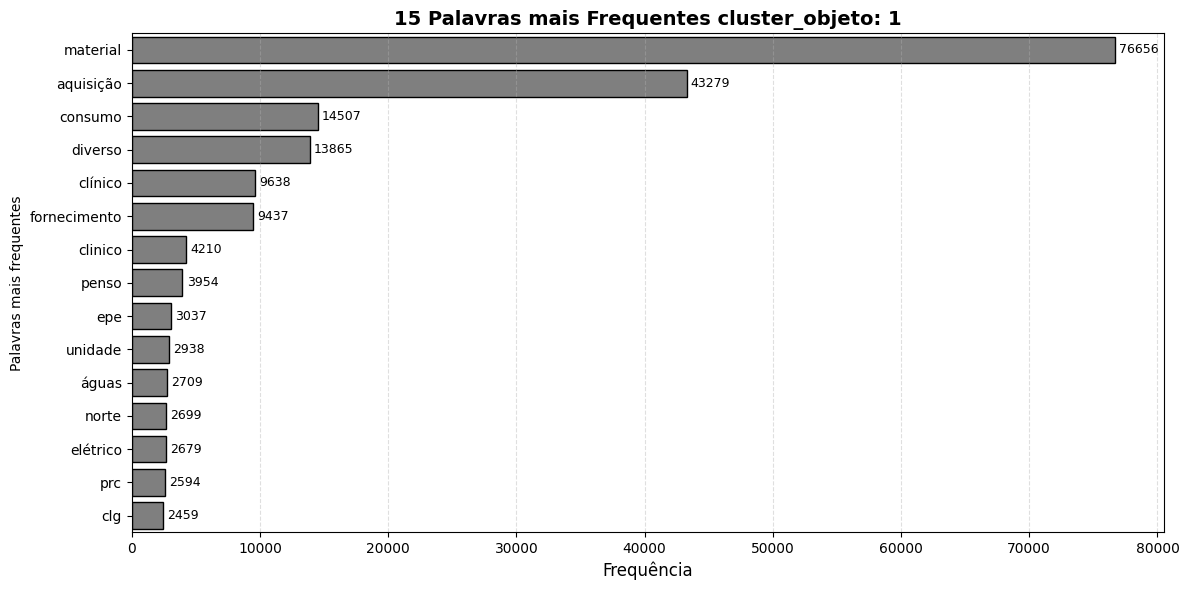

In [104]:
get_top_words(all_columns, column='cluster_objeto', tokens_col='Objeto_tokens', label = 1)

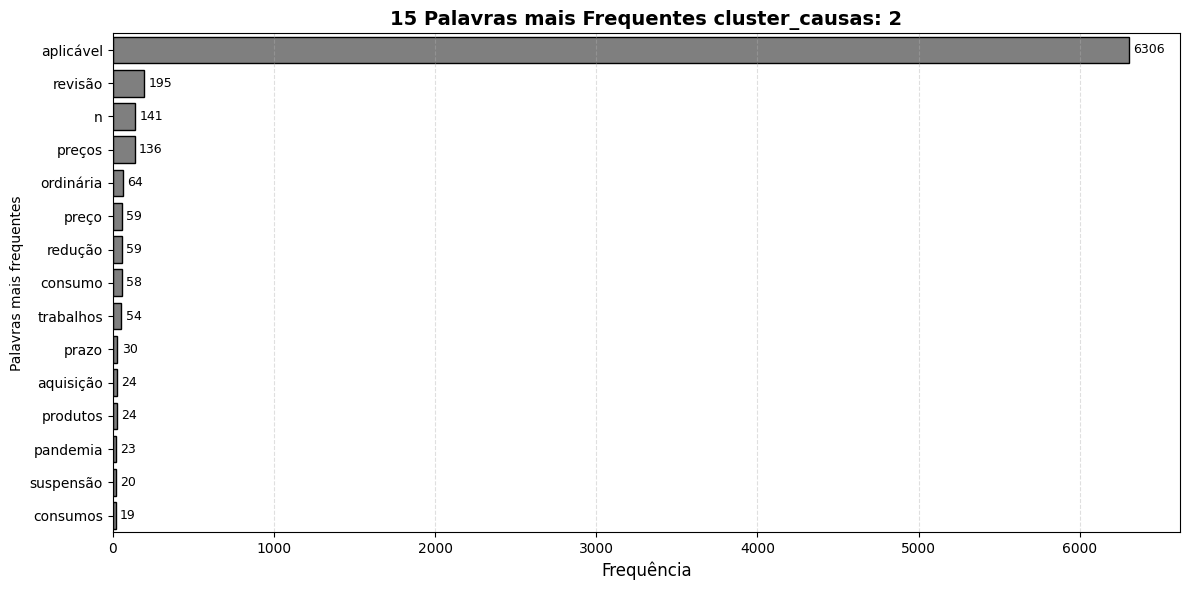

In [105]:
get_top_words(all_columns, column='cluster_causas', tokens_col='Causas_tokens', label = 2)

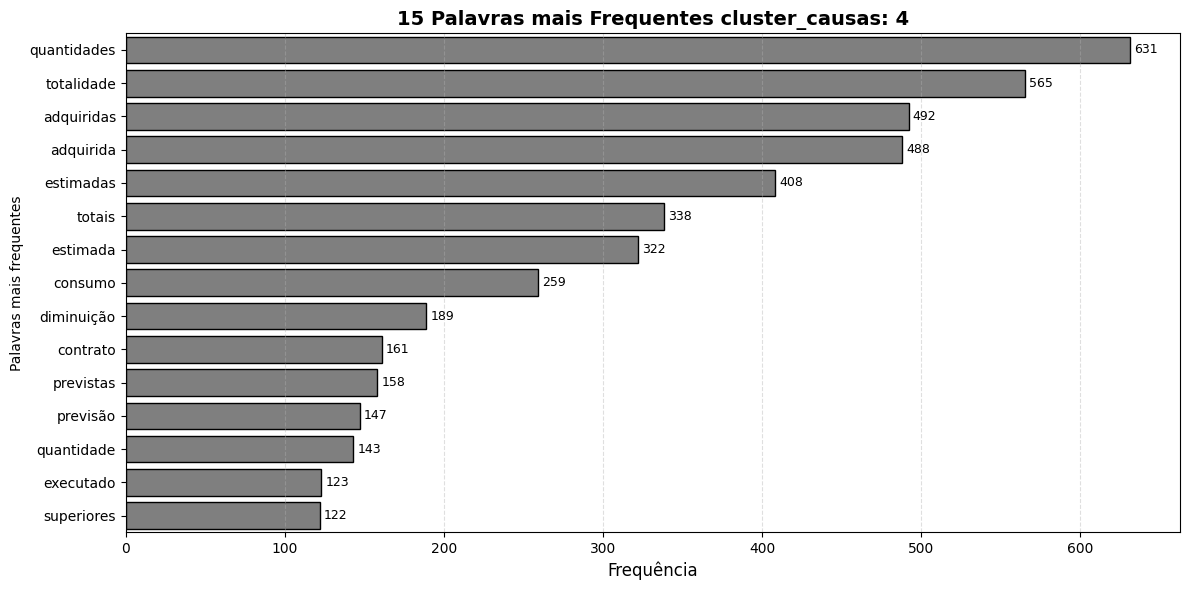

In [ ]:
# é possível ver a variação quando tenho um cluster objeto fixo
get_top_words(all_columns, column='cluster_causas', tokens_col='Causas_tokens', label = 4)

In [94]:
outro = all_columns[all_columns['Fundamentação da MC']!='Indemnização por redução do preço contratual (Art. 381.º do CCP)']

# removi contratos das regiões autónomas e aqueles que têm um count muito baixo para essas justificações

In [95]:
datasets_por_fundamentacao = {
    valor: grupo.reset_index(drop=True)
    for valor, grupo in outro.groupby('Fundamentação da MC')
}

In [96]:
def clusters_por_fund_tdidf(datasets_por_fundamentacao):
    data_por_fund_clusters={}
    for key in list(datasets_por_fundamentacao.keys()):
        data_set_fund = deepcopy(datasets_por_fundamentacao[key])

        labels_descricao, _, _, dist_descricao = cluster_text_column(data_set_fund, text_col='Breve Descrição do contrato_2_LIMPO', n_clusters=3, max_df=0.99,  min_df=0.001)

        labels_objeto, _, _, dist_objeto = cluster_text_column(data_set_fund, text_col='Objeto_LIMPO_2', n_clusters=3, max_df=0.99,  min_df=0.001)

        labels_causas, _, _, dist_causas= cluster_text_column(data_set_fund, text_col='Causas_LIMPO_2', max_df=0.99, n_clusters=3, min_df=0.001)

        data_set_fund['labels_causas'] = labels_causas
        data_set_fund['labels_descricao'] = labels_descricao
        data_set_fund['labels_objeto'] = labels_objeto
        data_set_fund['dist_causas'] = dist_causas
        data_set_fund['dist_objeto'] = dist_objeto
        data_set_fund['dist_descricao'] = dist_descricao

        data_por_fund_clusters[key] = data_set_fund

    return data_por_fund_clusters
        # Objetivo é dar return ao dataset com todos os clusters, 
        # para cada valor nas ter um dataset com as informações dessas fundamentações

In [97]:
data_set = clusters_por_fund_tdidf(datasets_por_fundamentacao)

c:\Users\carol\Documents\bolsa\indicators\Lib\site-packages\sklearn\cluster\_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [98]:
data_set.keys()

dict_keys(['Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)', 'Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. b) do CCP com redação da Lei n.º 30/2021, de 21.05)', 'Atualização extraordinária do preço dos contratos de aquisição de serviços com duração plurianual (art.42.º, n.º 1, da lei 24-D/2022, e Portaria 54/2023)', 'Cessão da posição contratual e subcontratação (art. 316.º e seguintes do CCP)', 'Cláusulas contratuais que indiquem de forma clara, precisa e inequívoca o âmbito e a natureza das eventuais modificações, bem como as condições em que podem ser aplicadas (art. 312.º, a) do CCP)', 'Interesse público (art. 312.º, al. c) do CCP com redação da Lei n.º 30/2021, de 21.05)', 'Interesse público decorrentes de necessidades novas ou de uma nova ponderação das circunstâncias existentes (art. 312.º, al. b) do CCP)', 'Modificações objetivas ao contrato de aquisição de bens (art. 447.º-A.º do CCP)', 'Modificações objetivas ao contrat

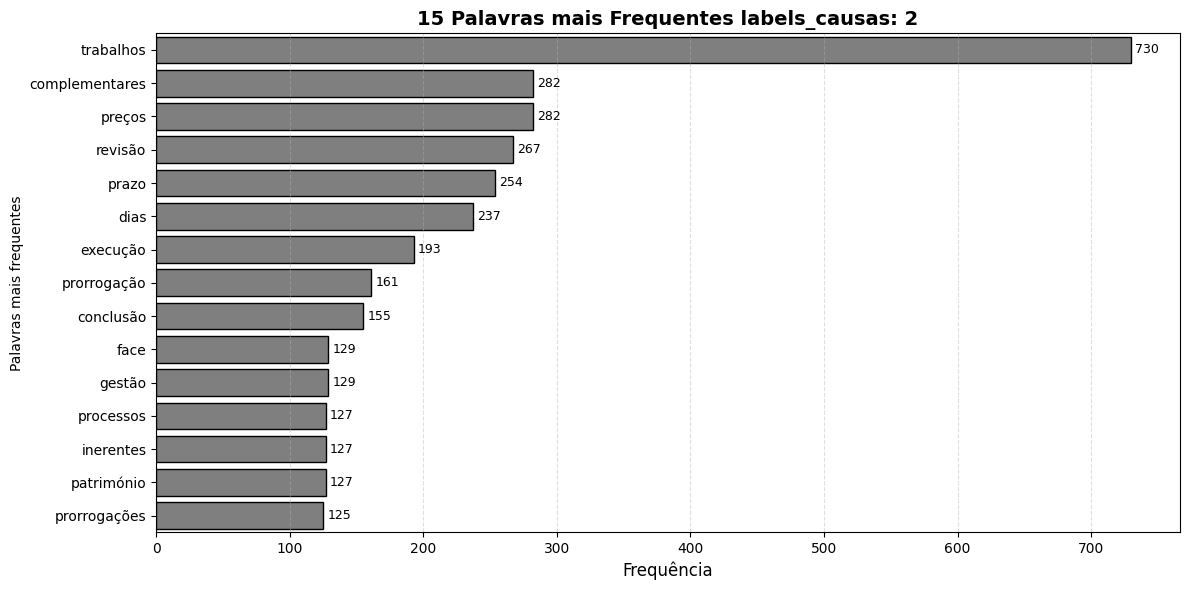

In [144]:
get_top_words(data_set['Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)'], column='labels_causas', tokens_col='Causas_tokens', label = 2)

In [ ]:
## O objetivo no fim é ficar com uma tentativa de segmentar os contratos que têm a mesma fundamentação

## Tentativa de clusters com os sentence transformers, mas são muito pesados

In [ ]:
# clusters para objeto e causas - ideia é depois analisar
## NÃO POSSO SÓ TER ESTAS COLUNAS CAROLINA LOL
cluster_df = cluster_embeddings(all_columns[['Objeto_LIMPO',
       'Causas das alterações no valor do contrato_LIMPO',
       'Causas das alterações ao prazo de execução do contrato_LIMPO',
       'Informação relevante sobre outros aspetos da execução do contrato_LIMPO',
       'Motivo do cumprimento não integral do contrato_LIMPO',
       'Informação relevante sobre outros aspetos do cumprimento não integral do contrato_LIMPO',
       'Apreciação sobre o desenvolvimento da obra_LIMPO',
       'Fatores externos condicionantes do arranque e desenvolvimento da obra_LIMPO',
       'Aspetos do desenvolvimento da obra_LIMPO',
       'Informação relevante relativa às sub-empreitadas_LIMPO',
       'Informação sobre Trabalhos Complementares_LIMPO', 'IDAliasProc', 'ContractID', 'Preço Contratual',
       'Número de Ordem do Lote', 'Designação do Lote', 'Valor do Lote',
       'Breve Descrição do Contrato_LIMPO', 'Descrição do Procedimento_LIMPO',
       'Data da Publicação da MC', 'Data da Modificação',
       'Fundamentação da MC', 'Tipo do Ato', 'Nº do Lote',
       'Preço Contratual Original', 'Novo Preço Contratual',
       'Objeto da subcontratação',
       'Subcontratação não ultrapassa valor total superior a 75 % do preço contratual (383.º nº2 do CCP)',
       'Gestor do Contrato', 'Número de MC', 'Causas_LIMPO',
       'Breve Descrição do Contrato_EMB', 'Objeto_EMB', 'Causas_EMB']], emb_col='Objeto_EMB', prefix='Objeto', normalize=False)

cluster_df = cluster_embeddings(cluster_df, emb_col='Causas_EMB', prefix='Causas', normalize=False)

In [ ]:
cluster_df[['Objeto_dist', 'Causas_dist']].describe()

,Objeto_dist,Causas_dist
count,300.000000,300.000000
mean,6.705899,4.577250
std,0.695179,1.168140
min,5.140175,0.873632
25%,6.196469,4.006881
50%,6.602214,4.672021
75%,7.186650,5.292913
max,9.292506,7.066176


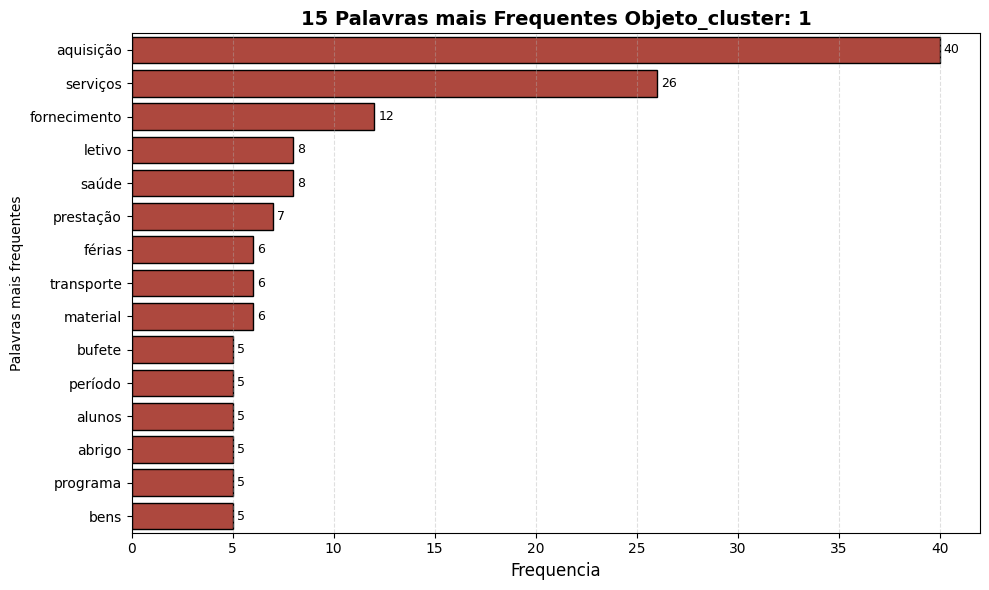

In [151]:
cluster_df['Objeto_tokens'] = [text.split() for text in cluster_df['Objeto_LIMPO_2']]
get_top_words(cluster_df, column='Objeto_cluster', tokens_col='Objeto_tokens',label = 1)

In [ ]:
cluster_df['Causas_LIMPO_2'] = cluster_df['Causas_LIMPO'].apply(lambda x: clean_text(x, stopwords=stopwords, numbers=False, remove_numbers=True, solos=True))

In [ ]:
cluster_df['Causas_tokens'] = [text.split() for text in cluster_df['Causas_LIMPO_2']]
get_top_words(cluster_df, column='Causas_cluster', tokens_col='Causas_tokens',label = 2)

In [99]:
datasets_por_fundamentacao = {
    valor: grupo.reset_index(drop=True)
    for valor, grupo in all_columns.groupby('Fundamentação da MC')
}

In [100]:
datasets_por_fundamentacao.keys()

dict_keys(['Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)', 'Cláusulas contratuais que indiquem de forma clara, precisa e inequívoca o âmbito e a natureza das eventuais modificações, bem como as condições em que podem ser aplicadas (art. 312.º, a) do CCP)', 'Interesse público (art. 312.º, al. c) do CCP com redação da Lei n.º 30/2021, de 21.05)', 'Interesse público decorrentes de necessidades novas ou de uma nova ponderação das circunstâncias existentes (art. 312.º, al. b) do CCP)', 'Prorrogação de Prazo contratual (art.º 13.º do D.L. n.º 06/2004, 06-01, na sua redação atual)', 'Prorrogação de Prazo contratual (art.º 4.º do D.L. n.º 36/2022, 20-05)', 'Revisão Ordinária de Preços', 'Revisão de preços Extraordinária (D.L. n.º 36/2022, 20-05)', 'Trabalhos Complementares (art. 370.º do CCP)', 'Trabalhos Complementares (art. 370.º do CCP) e Trabalhos a Menos (art. 379.º)', 'Trabalhos a menos (Art. 379.º do CCP)'])

In [ ]:
clusters_por_fundament = clusters_por_fund(datasets_por_fundamentacao)

dict_keys(['Trabalhos Complementares (art. 370.º do CCP)', 'Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)'])

## Juntar todas as colunas de texto e ver se em algum momento, algum token da fundamentação aparece no contrato

In [ ]:
# para cada fundamentação, vou ver se há palavras chave que aparecem aqui, se não houverem palavras chave vou considerar como incoerência
# não estou a considerar contratos das regiões autónomas

In [ ]:
text_cols = ['Causas das alterações ao prazo de execução do contrato_LIMPO', 'Causas das alterações no valor do contrato_LIMPO', 'Informação relevante sobre outros aspetos da execução do contrato_LIMPO',
             'Motivo do cumprimento não integral do contrato_LIMPO', 'Informação relevante sobre outros aspetos do cumprimento não integral do contrato_LIMPO',
             'Informação sobre Trabalhos Complementares_LIMPO', 'Fatores externos condicionantes do arranque e desenvolvimento da obra_LIMPO',
             'Aspetos do desenvolvimento da obra_LIMPO', 'Informação relevante relativa às sub-empreitadas_LIMPO']

In [153]:
all_columns["texto_combinado"] = all_columns.apply(lambda row: combine_text(row, text_cols), axis=1)

In [154]:
all_columns['texto_combinado'].value_counts()

texto_combinado
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    2041250
Motivo do cumprimento não integral do contrato: O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil                                                                                                                                                                                                                                          

In [ ]:
dic_ajuda = {
    'Trabalhos Complementares (art. 370.º do CCP)': ['trabalhos complementares'],
    'Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)': ['alteração anormal e imprevisível das circunstâncias', 'alteração das circunstâncias'],
    'Interesse público decorrentes de necessidades novas ou de uma nova ponderação das circunstâncias existentes (art. 312.º, al. b) do CCP)': ['nova ponderação das circunstâncias existentes', 'necessidades novas'],
    'Serviços Complementares (art. 454.º do CCP)': ['serviços complementares'],
    'Interesse público (art. 312.º, al. c) do CCP com redação da Lei n.º 30/2021, de 21.05)': ['interesse público'],
    'Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. b) do CCP com redação da Lei n.º 30/2021, de 21.05)': ['alteração anormal e imprevisível das circunstâncias'],
    'Revisão Ordinária de Preços': ['revisão Ordinária de Preços'],
    'Cessão da posição contratual e subcontratação (art. 316.º e seguintes do CCP)': ['cessão da posição contratual e subcontratação', 'cessão da posição contratual'],
    'Trabalhos a menos (Art. 379.º do CCP)': ['trabalhos a menos'],
    'Trabalhos Complementares (art. 370.º do CCP) e Trabalhos a Menos (art. 379.º)': ['trabalhos complementares'],
    'Cláusulas contratuais que indiquem de forma clara, precisa e inequívoca o âmbito e a natureza das eventuais modificações, bem como as condições em que podem ser aplicadas (art. 312.º, a) do CCP)': ['cláusulas contratuais'],
    'Prorrogação de Prazo contratual (art.º 13.º do D.L. n.º 06/2004, 06-01, na sua redação atual)': ['prorrogação do prazo contratual'],
    'Prorrogação de Prazo contratual (art.º 4.º do D.L. n.º 36/2022, 20-05)': ['prorrogação do prazo contratual'],
    'Modificações objetivas ao contrato de aquisição de bens (art. 447.º-A.º do CCP)': ['modificações objeetivas ao contrato de aquisição de bens'],
    'Revisão de preços Extraordinária (D.L. n.º 36/2022, 20-05)': ['revisão de preços'],
    'Modificações objetivas ao contrato de aquisição de serviços (art. 454.º do CCP)': ['modificações objetivas ao contrato de aquisição de serviços'],
    'Reposição do equilíbrio financeiro do contrato (Art. 282.º do CCP)': ['equilíbio financeiro'],
    'Prestações Complementares (art. 420.º-A, 438.º - revogado com a Lei n.º 30/2022, 454.º do CCP)': ['prestações complementares'],
    'Atualização extraordinária do preço dos contratos de aquisição de serviços com duração plurianual (art.42.º, n.º 1, da lei 24-D/2022, e Portaria 54/2023)': ['atualização extraordinária do preço dos contratos de aquisição de serviços com duração plurianual'],
    'Modificações objetivas ao contrato de concessão de obras públicas e de serviços públicos': ['modificações objetivas ao contrato de concessão de obras públicas', 'modificações objetivas ao contrato de serviços públicos'],
    'Modificações objetivas ao contrato de locação de bens móveis (art. 432.º do CCP)': ['modificações objetivas ao contrato de locação de bens móveis'],
    'Indemnização por redução do preço contratual (Art. 381.º do CCP)': ['indeminização por redução do preço contratual']
} 
# dados anotados que até posso depois passar para o LLM não sei bem isto podia ajudar
# este mapeamento até pode ser feito com ajuda do tribunal de contas e depois ser utilizado num LLM - mandei mail ao tribunal de contas
# mapeamento também para o objeto contratual, qualquer coisa assim
# importante ver como consigo correr um LLM localmente

In [157]:
all_columns['procurar'] = all_columns['Fundamentação da MC'].map(dic_ajuda)

In [159]:
all_columns['flag'] = all_columns.apply(
    lambda r: verificar_tokens(r, tokens_col='procurar', text_col='texto_combinado', mode='any'),
    axis=1
)

In [160]:
all_columns['flag'].value_counts()

flag
não coerente    2511716
coerente           3057
Name: count, dtype: int64

In [165]:
all_columns[all_columns['Fundamentação da MC'].notna()]['flag'].value_counts()

flag
não coerente    40212
coerente         3057
Name: count, dtype: int64

In [161]:
all_columns[all_columns['flag']=='coerente'][['Fundamentação da MC', 'texto_combinado']].values[44]

array(['Trabalhos Complementares (art. 370.º do CCP)',
       'Causas das alterações ao prazo de execução do contrato: Execução de trabalhos complementares e suspensões derivadas ao covid-19., Causas das alterações no valor do contrato: Trabalhos complementares e erros de medição., Motivo do cumprimento não integral do contrato: O cumprimento, a impossibilidade definitiva e todas as restantes causas de extinção das obrigações reconhecidas pelo direito civil, Informação sobre Trabalhos Complementares: trabalhos relativos à destruição de canal de águas pluviais, apenas detetado durante a execução da obra., Fatores externos condicionantes do arranque e desenvolvimento da obra: Pandemia covid-19., Aspetos do desenvolvimento da obra: A obra decorreu com desenvolvimento regular.'],
      dtype=object)

In [164]:
all_columns[all_columns['flag']=='coerente']['Fundamentação da MC'].value_counts()

Fundamentação da MC
Trabalhos Complementares (art. 370.º do CCP)                                                                                               2562
Trabalhos Complementares (art. 370.º do CCP) e Trabalhos a Menos (art. 379.º)                                                               243
Trabalhos a menos (Art. 379.º do CCP)                                                                                                       159
Revisão de preços Extraordinária (D.L. n.º 36/2022, 20-05)                                                                                   25
Serviços Complementares (art. 454.º do CCP)                                                                                                  24
Interesse público decorrentes de necessidades novas ou de uma nova ponderação das circunstâncias existentes (art. 312.º, al. b) do CCP)      15
Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)                                     

In [162]:
all_columns[all_columns['flag']=='não coerente']['Fundamentação da MC'].value_counts()

Fundamentação da MC
Trabalhos Complementares (art. 370.º do CCP)                                                                                                                                                          11618
Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)                                                                                                                        7555
Interesse público decorrentes de necessidades novas ou de uma nova ponderação das circunstâncias existentes (art. 312.º, al. b) do CCP)                                                                4470
Serviços Complementares (art. 454.º do CCP)                                                                                                                                                            3153
Interesse público (art. 312.º, al. c) do CCP com redação da Lei n.º 30/2021, de 21.05)                                                                              

Isto pode ser um bom primeiro passo, perceber, de acordo com esta fundamentação, como é que eu posso analisar os contratos. Até posso usar um LLM para fazer esta distinção em vez de fazer isto manualmente.

In [ ]:
stop

# A partir daqui é reciclagem

## Análise e agrupamento de colunas

As colunas de descrição do lote parecem-me muito mais reais, perceber qual é a diferença e porque é que isso acontece. Lotes diferentes acho que não é relevante. Lotes diferentes pertencem ao mesmo contrato - ninguém sabe bem.

Ideia principal - Perceber quais as colunas de fundamentação a utilizar, nomeadamente no que toca à alteração do contrato, também poderia ser interessante perceber porque é que o contrato foi "cancelado".

Pensar na pipeline para o LLM -> mostrar explicitamente que coluna é que têm artigos e que coisas é que eu quero levantar.

### Objeto do contrato - limpeza para depois tentar passar para o LLM

In [ ]:
contratos.columns

In [ ]:
contratos['Objeto'].value_counts().head(30)

In [ ]:
contratos['Objeto'].value_counts().tail(30)

In [ ]:
contratos['Tipo(s) de contrato'].value_counts()

In [ ]:
# PERCEBER O PAPEL DAS SIGLAS E DOS NÚMEROS
# VER PARA QUE CONTRATOS É QUE SE CALCULA ESTAS COISAS



In [ ]:
contratos.dropna(subset='Objeto', inplace=True)
contratos['Objeto_limpo']=contratos['Objeto'].apply(lambda x: clean_objeto(x))

In [ ]:
contratos['Objeto_limpo'].value_counts().tail(30)

In [ ]:
contratos['Objeto_limpo'].value_counts().head(30)

In [ ]:
contratos[contratos['Objeto_limpo']=='PA']['Objeto']

### Colunas de fundamentação no data set contratos

Tenho de fazer embeddings e tentar perceber que coluanas é que são terríveis, não dizem nada e fazer tipo clusters talvez, acho que pode ser a melhor forma, para limpar strings desprovidas de valor.

In [ ]:
contratos['Causas das alterações ao prazo de execução do contrato'].value_counts()

In [ ]:
contratos['Causas das alterações no valor do contrato'].value_counts().head(20)

In [ ]:
contratos['Causas das alterações ao prazo de execução do contrato'].isna().sum()

In [ ]:
contratos['Causas das alterações no valor do contrato'].isna().sum()

In [ ]:
len(contratos[(contratos['Causas das alterações ao prazo de execução do contrato'].isna()) & (contratos['Causas das alterações no valor do contrato'].isna())])

In [ ]:
contratos['Causas alteraçoes ao prazo LIMPO']=contratos['Causas das alterações ao prazo de execução do contrato'].apply(lambda x: clean_fundamentacao(x) if pd.notna(x) else x)
contratos['Causas alteraçoes ao valor LIMPO']=contratos['Causas das alterações no valor do contrato'].apply(lambda x: clean_fundamentacao(x) if pd.notna(x) else x)

contratos['Causas alteraçoes ao prazo LIMPO']=np.where(contratos['Causas alteraçoes ao prazo LIMPO'].str.strip().isin(['']), np.NAN, contratos['Causas alteraçoes ao prazo LIMPO'])
contratos['Causas alteraçoes ao valor LIMPO']=np.where(contratos['Causas das alterações no valor do contrato'].str.strip().isin(['']), np.NAN, contratos['Causas alteraçoes ao valor LIMPO'])

In [ ]:
contratos['Causas alteraçoes ao prazo LIMPO'].value_counts().head(10)

In [ ]:
contratos['Causas alteraçoes ao valor LIMPO'].value_counts().head(10)

#### Tentativa de fazer cluster para as causas do prazo - ainda em desenvolvimento

##### Kmeans com o td idf

In [ ]:
# Prepara os textos
texts = contratos['Causas alteraçoes ao prazo LIMPO'].dropna().unique().tolist()

# Cria matriz TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # podes ajustar max_features
tfidf_matrix = vectorizer.fit_transform(texts)
tfidf_matrix_normalized = normalize(tfidf_matrix, norm='l2')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_clusters = range(3, 15)
inertia = []
silhouette_scores = []

for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=SEED)
    labels = kmclust.fit_predict(tfidf_matrix_normalized)
    
    inertia.append(kmclust.inertia_)
    silhouette = silhouette_score(tfidf_matrix_normalized, labels)
    silhouette_scores.append(silhouette)

# Plotar os dois gráficos
fig, ax1 = plt.subplots()

# Eixo da esquerda: Inertia
ax1.plot(range_clusters, inertia, 'o-', label='Inertia', color='blue')
ax1.set_xlabel('Número de clusters')
ax1.set_ylabel('Inertia', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo da direita: Silhouette Score
ax2 = ax1.twinx()
ax2.plot(range_clusters, silhouette_scores, 's--', label='Silhouette Score', color='green')
ax2.set_ylabel('Silhouette Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Inertia e Silhouette Score vs. Número de Clusters')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


In [ ]:
# Clustering com KMeans (usa automaticamente distância euclidiana, mas funciona OK para vetores esparsos)
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(tfidf_matrix_normalized)

# Guardar resultados
contratos['cluster'] = contratos['Causas alteraçoes ao prazo LIMPO'].map(
    dict(zip(texts, labels))
)

In [ ]:
contratos['cluster'].value_counts()

In [ ]:
contratos[contratos['cluster']==5]['Causas alteraçoes ao prazo LIMPO'].value_counts().head(20)

##### Tentativa de sentence transformers e kmeans

In [ ]:
# tentar embeddings para depois ver a similaridade e eliminar os que não prestam
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2', device='cpu')
texts = contratos['Causas alteraçoes ao prazo LIMPO'].dropna().unique().tolist()
embeddings = model.encode(texts, batch_size=16, show_progress_bar=True)

# Criar dicionário de texto → embedding
emb_dict = dict(zip(texts, embeddings))

contratos['Causas alteraçoes ao prazo EMBEDDINGS'] = contratos['Causas alteraçoes ao prazo LIMPO'].map(emb_dict)
embeddings_norm = normalize(embeddings)
emb_norm_dict = dict(zip(texts, embeddings_norm))

In [ ]:
range_clusters = range(3, 15)
inertia = []
silhouette_scores = []

for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=SEED)
    labels = kmclust.fit_predict(embeddings_norm)
    
    inertia.append(kmclust.inertia_)
    silhouette = silhouette_score(embeddings_norm, labels)
    silhouette_scores.append(silhouette)

# Plot Inertia e Silhouette Score
fig, ax1 = plt.subplots()

# Inertia (eixo esquerdo)
ax1.plot(range_clusters, inertia, 'o-', label='Inertia', color='blue')
ax1.set_xlabel('Número de clusters')
ax1.set_ylabel('Inertia', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Silhouette Score (eixo direito)
ax2 = ax1.twinx()
ax2.plot(range_clusters, silhouette_scores, 's--', label='Silhouette Score', color='green')
ax2.set_ylabel('Silhouette Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Inertia e Silhouette Score vs. Número de Clusters')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


In [ ]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(embeddings_norm)

# Dicionário texto → label
cluster_dict = dict(zip(texts, labels))

# Adicionar coluna com o cluster ao DataFrame
contratos['Causa CLUSTER Emb'] = contratos['Causas alteraçoes ao prazo LIMPO'].map(cluster_dict)

In [ ]:
contratos['Causa CLUSTER Emb'].value_counts()

In [ ]:
contratos[contratos['Causa CLUSTER Emb']==8]['Causas alteraçoes ao prazo LIMPO'].value_counts().tail(50)

In [ ]:
contratos[contratos['Causa CLUSTER Emb']==1]['Causas alteraçoes ao prazo LIMPO'].value_counts().head(30)

In [ ]:
contratos[contratos['Causa CLUSTER Emb']==4]['Causas alteraçoes ao prazo LIMPO'].value_counts().head(30)

#### KNN para classificar pedaços de texto que são maus

In [ ]:
vc = contratos['Causas alteraçoes ao prazo LIMPO'].value_counts()
print(vc.iloc[80:120])

In [ ]:
frases_inuteis = [
    "sem informação", "n a", "nan", "não aplicável", "-", "nada a referir", "não houve alterações", "dentro do prazo", "sem alteração", "cumprido", "não há nada de relevante a assinalar"
]
frases_uteis = [
    "trabalhos complementares", "atraso na execução inicio conclusão de trabalhos face a processos inerentes à gestão do património fracções habitadas desocupações outros", "prazo de execução superior ao previsto", "prorrogação do prazo", "data do espetáculo alterada conforme adenda devido à covid",
    "efetuado antes do tempo previsto", "o fornecimento de bens efectuado em data posterior ao previsto", "revogação do contrato"
]

frases = frases_inuteis + frases_uteis
labels = [0]*len(frases_inuteis) + [1]*len(frases_uteis)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
embeddings_frases_modelo = model.encode(frases)
knn = KNeighborsClassifier(n_neighbors=3, metric='cosine')
knn.fit(embeddings_frases_modelo, labels)

In [ ]:
preds = knn.predict(embeddings)

In [ ]:
preds

In [ ]:
df_preds = pd.DataFrame({
    'texto': texts,
    'predicao': preds
})

In [ ]:
df_preds

In [ ]:
df_preds[df_preds['predicao']==0]

In [ ]:
df_preds[df_preds['predicao']==0]['texto'].values[27]


In [ ]:
df_preds[df_preds['predicao']==1]['texto'].values[3]


### Coluna de fundamentaçõa no dataset Anexo XII

In [ ]:
contratos.columns

In [ ]:
contratos['Tipo(s) de contrato'].value_counts()

In [ ]:
anexo_xii['Fundamentação da MC'].value_counts()

In [ ]:
anexo_xii['Tipo do Ato'].value_counts()

In [ ]:
anexo_xii.isna().sum()

### Tentar dar match nas colunas de fundamentação

In [ ]:
lotes_contratos = contratos.merge(lotes, left_on=["N.º Procedimento (ID BASE)", "N.º Contrato"], right_on=["IDAliasProc", "ContractID"], how='left')
numero_mc=anexo_xii.groupby(['N.º Procedimento (ID BASE)', 'N.º Contrato','Nº do Lote']).size().rename('Número de MC').reset_index()
modification_data = pd.merge(anexo_xii, numero_mc, how='left', on=['N.º Procedimento (ID BASE)', 'N.º Contrato','Nº do Lote'])
all_columns=pd.merge(lotes_contratos, modification_data, how='left', left_on=["N.º Procedimento (ID BASE)", "N.º Contrato", 'Número de Ordem do Lote'], right_on=['N.º Procedimento (ID BASE)', 'N.º Contrato','Nº do Lote'])

In [ ]:
all_fund_columns['Fundamentação da MC'].value_counts()

In [ ]:
all_fund_columns['Objeto_limpo']=all_fund_columns['Objeto_limpo'].str.lower()

In [ ]:
all_fund_columns['Objeto'].values[90]

In [ ]:
datasets_por_fundamentacao = {
    valor: grupo.reset_index(drop=True)
    for valor, grupo in all_fund_columns.groupby('Fundamentação da MC')
}

In [ ]:
datasets_por_fundamentacao['Trabalhos a menos (Art. 379.º do CCP)']['Objeto_limpo'].value_counts()

In [ ]:
all_fund_columns['Fundamentação da MC'].isna().sum()

In [ ]:
(1-(all_fund_columns[all_fund_columns['Ajuste Direto Simplificado']==0]['Fundamentação da MC'].isna().sum())/len(all_fund_columns))

In [ ]:
(1-(all_fund_columns[all_fund_columns['Ajuste Direto Simplificado']==0]['Causas alteraçoes ao valor LIMPO'].isna().sum())/len(all_fund_columns))

In [ ]:
# desisti de fazer as coisas para a fundamentação, lol só 1% dos 

In [ ]:
datasets_por_fundamentacao['Trabalhos a menos (Art. 379.º do CCP)']['Objeto_limpo'].value_counts()

In [ ]:
datasets_por_fundamentacao['Trabalhos a menos (Art. 379.º do CCP)']['Causas alteraçoes ao valor LIMPO'].value_counts()

In [ ]:
datasets_por_fundamentacao['Trabalhos a menos (Art. 379.º do CCP)']['Causas alteraçoes ao prazo LIMPO'].value_counts()

In [ ]:
datasets_por_fundamentacao['Trabalhos Complementares (art. 370.º do CCP)']['Causas alteraçoes ao prazo LIMPO'].value_counts()

In [ ]:
datasets_por_fundamentacao['Alteração anormal e imprevisível das circunstâncias (Art. 312.º, al. a) do CCP)']['Objeto'].value_counts()

In [ ]:
datasets_por_fundamentacao['Trabalhos a menos (Art. 379.º do CCP)']['Tipo(s) de contrato'].value_counts()

In [ ]:
all_fund_columns['Tipo(s) de contrato'].value_counts()

In [ ]:
all_fund_columns[all_fund_columns['Fundamentação da MC']=='Modificações objetivas ao contrato de aquisição de serviços (art. 454.º do CCP)']['Tipo(s) de contrato'].value_counts()

In [ ]:
all_fund_columns['Ajuste Direto Simplificado'].value_counts()

In [ ]:
all_fund_columns[all_fund_columns['Ajuste Direto Simplificado']==0]['Objeto_limpo'].value_counts()

In [ ]:
all_fund_columns[all_fund_columns['Ajuste Direto Simplificado']==0]['Identificação do contrato'].value_counts()

In [ ]:
all_fund_columns[all_fund_columns['Ajuste Direto Simplificado']==0]['Objeto_limpo'].value_counts()

In [ ]:
all_fund_columns.columns

In [ ]:
all_fund_columns[all_fund_columns['Ajuste Direto Simplificado']==0]

In [ ]:
all_fund_columns['Tipo de procedimento'].value_counts()

In [ ]:
# bom exemplo
all_fund_columns[all_fund_columns['Objeto']=='Aquisição de Transportes especiais'][['Preço Contratual', 'Nº do Lote', 'Data de fecho do contrato',  'Valor do Lote', 'Número de Ordem do Lote', 'Entidade(s) Adjudicatária(s) - Descrição', 'Objeto', 'Entidade(s) Adjudicante(s) - Descrição', 'Fundamentação da MC', 'Tipo(s) de contrato']]

In [ ]:
all_fund_columns[all_fund_columns['Fundamentação da MC']=='Trabalhos Complementares (art. 370.º do CCP)'].shape

In [ ]:
all_fund_columns.columns

In [ ]:
all_fund_columns.to_csv('all_columns.csv')

In [ ]:
all_fund_columns[all_fund_columns['Fundamentação da MC']=='Trabalhos Complementares (art. 370.º do CCP)']['Informação sobre Trabalhos Complementares'].isna().sum()

In [ ]:
all_fund_columns[(all_fund_columns['Causas alteraçoes ao prazo LIMPO'].isna()) & (all_fund_columns['Causas das alterações no valor do contrato'].isna())]['Fundamentação da MC'].value_counts()

In [ ]:
all_fund_columns[all_fund_columns['Causas alteraçoes ao prazo LIMPO'].notna()]['Fundamentação da MC'].value_counts()